- Welcome to Quantitative and High Frequency Trading Training Program
- In this week, we will


- Add rolling maximum and minimum to the data
- Test 5 predictive signals and generate each result
- Compare the resutls to see which signal perform the best
- Compare each day's result to check which days perform the best or worst
- Make some adjustments to the signals and check out the result
- Repeat the process to another data set I give you, each person may have different data sets


- We can repeat some of the process of week 2


- Change the path of helper.r if needed

In [1]:
from helper import *
from stats import *
from product_info import *
from imp import reload  
import helper
import stats
reload(helper)
reload(stats)
## if there is any conflict of duplicate functions between helper and stats
## we use the function of stats

<module 'stats' from 'C:\\Users\\dell\\stats.py'>

 number of cores, set this number according to your computer

In [2]:
CORE_NUM = int(os.environ['NUMBER_OF_PROCESSORS'])
CORE_NUM

16

- sample product, you can change to your specific product symbol

In [3]:
product_list = ["btc.usd.td", "eth.usd.td", "btc.usdt", "eth.usdt"]
product = product_list[0]

- get all of the dates

In [4]:
import dask
from dask import compute, delayed

- get good night date

- now it's see why we use this kind of data

In [5]:
all_dates = os.listdir(DATA_PATH + product_list[0])
all_dates.sort()
n_days = len(all_dates)


- we randomly choose a day

In [6]:
data = load(DATA_PATH+product_list[0]+"/"+all_dates[1])

In [7]:
data.columns

Index(['time', 'ask_0_p', 'ask_0_v', 'ask_1_p', 'ask_1_v', 'ask_2_p',
       'ask_2_v', 'ask_3_p', 'ask_3_v', 'ask_4_p', 'ask_4_v', 'ask_5_p',
       'ask_5_v', 'ask_6_p', 'ask_6_v', 'ask_7_p', 'ask_7_v', 'ask_8_p',
       'ask_8_v', 'ask_9_p', 'ask_9_v', 'bid_0_p', 'bid_0_v', 'bid_1_p',
       'bid_1_v', 'bid_2_p', 'bid_2_v', 'bid_3_p', 'bid_3_v', 'bid_4_p',
       'bid_4_v', 'bid_5_p', 'bid_5_v', 'bid_6_p', 'bid_6_v', 'bid_7_p',
       'bid_7_v', 'bid_8_p', 'bid_8_v', 'bid_9_p', 'bid_9_v', 'last',
       'timestamp', 'volume', 'good', 'intra.time', 'ask.qty', 'bid.qty',
       'bid', 'ask', 'wpr', 'next.bid', 'next.ask', 'wpr.ret', 'ret',
       'min.1024', 'max.1024', 'min.2048', 'max.2048', 'min.4096', 'max.4096'],
      dtype='object')

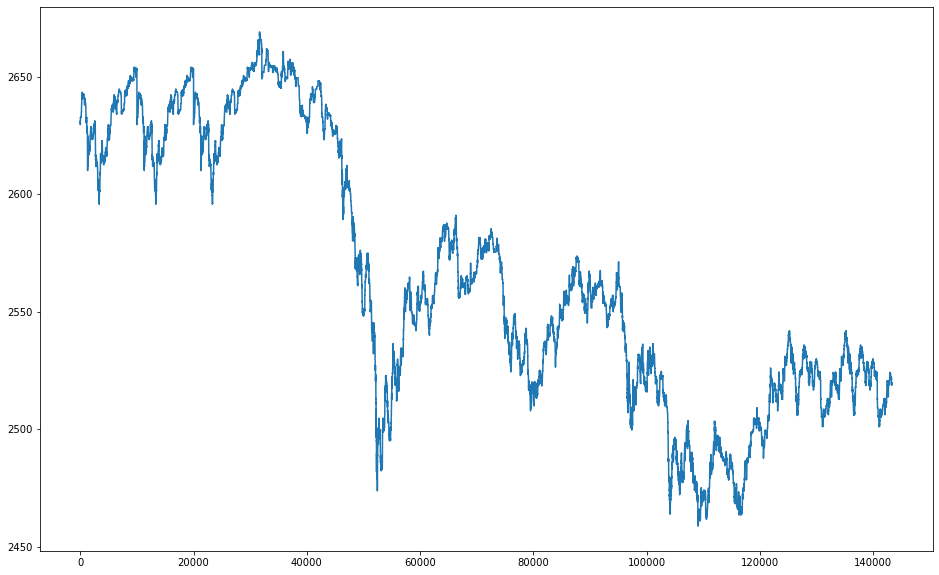

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(16, 10))
plt.plot(data["wpr"].values);

- plot the maximum price of 2048 ticks
- plot the minimum price of 2048 ticks

In [9]:
period_list = [1024, 2048, 4096]

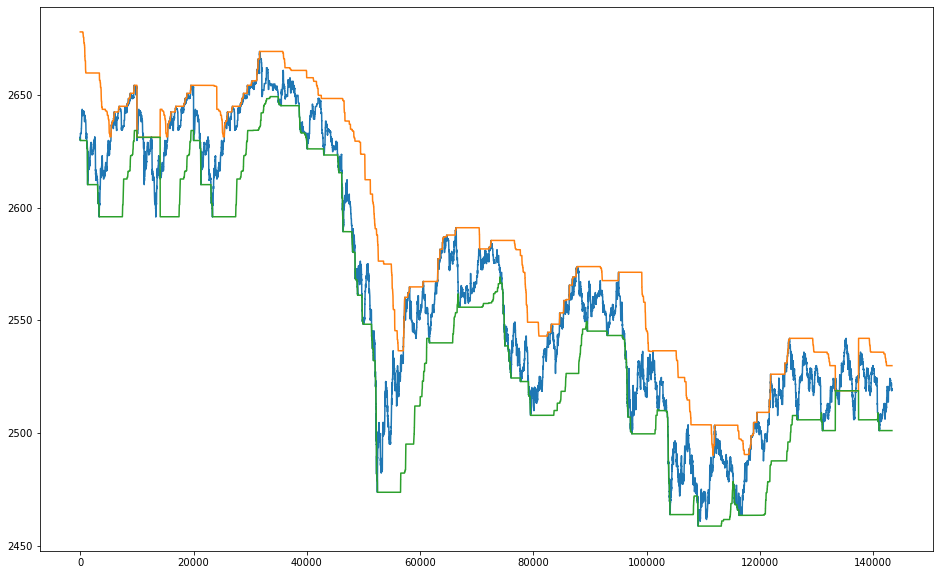

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(16, 10))
plt.plot(data["wpr"].values)
plt.plot(data["max.4096"].values)
plt.plot(data["min.4096"].values);

## we can see the result meets our expectation
## it may take long time to calculate the min and max of wpr prices
## I give you the estimated time of using 4 cores, so you can deal with other affairs while waiting for result
## but signals using min/max would be sometimes very useful
## the the time to calculating min/max pay off in the end
## In practice, when using c++ to calculating min/max on a rolling basis
## there would be some efficient algorithm, which is faster than comparing all numbers at every tick
## we would talk about it later in our C++ class

- Test 5 predictive signals and generate each result
- now let's see the first signal, which is simply related to price action without trading volume


- set the sample period length

In [11]:
period = 4096

- the first signal

In [56]:
## utilize the bid and ask quantity changes
## but the original quantity may not be stationary, i.e. it would have very large values
## usually from 0 to 200
## but can be up to several tens of thousand
## so we use the change of qty's direction instead
## it has only -1 0 1 so it's stionary, but it's dicrerte
## then we add ewma as fitler to make it more continuous
## we hope the signals are continuous values

from collections import OrderedDict
class foctor_dbook_period(factor_template):
    factor_name = "dbook.period"
    
    params = OrderedDict([
        ("period", np.power(2, range(10,13)))
    ])
    
    def formula(self, data, period):
        diff_bid_qty = data["bid.qty"] - data["bid.qty"].shift()
        diff_bid_qty[0] = 0
        diff_ask_qty = data["ask.qty"] - data["ask.qty"].shift()
        diff_ask_qty[0] = 0
        return ewma(np.sign(diff_bid_qty)-np.sign(diff_ask_qty), period, adjust=True).values

In [57]:
x3 = foctor_dbook_period()
x3
# factor_name:
# dbook.period

# formula:
#     def formula(self, data, period):
#         diff_bid_qty = data["bid.qty"] - data["bid.qty"].shift()
#         diff_bid_qty[0] = 0
#         diff_ask_qty = data["ask.qty"] - data["ask.qty"].shift()
#         diff_ask_qty[0] = 0
#         return ewma(np.sign(diff_bid_qty)-np.sign(diff_ask_qty), period, adjust=True).values


# params:
# $period:[1024 2048 4096]

factor_name:
dbook.period

formula:
    def formula(self, data, period):
        diff_bid_qty = data["bid.qty"] - data["bid.qty"].shift()
        diff_bid_qty[0] = 0
        diff_ask_qty = data["ask.qty"] - data["ask.qty"].shift()
        diff_ask_qty[0] = 0
        return ewma(np.sign(diff_bid_qty)-np.sign(diff_ask_qty), period, adjust=True).values


params:
$period:[1024 2048 4096]

- create directory for dbook signal

In [22]:
file

'd:/intern/pkl tick/btc.usdt/2019-09-28.pkl'

In [23]:
data = load(file)

In [58]:
SAVE_PATH = "e:/intern"
for product in product_list:
    create_signal_path(x3, product, SAVE_PATH)

e:/intern/tmp pkl/btc.usd.td/dbook.1024
e:/intern/tmp pkl/btc.usd.td/dbook.2048
e:/intern/tmp pkl/btc.usd.td/dbook.4096
e:/intern/tmp pkl/eth.usd.td/dbook.1024
e:/intern/tmp pkl/eth.usd.td/dbook.2048
e:/intern/tmp pkl/eth.usd.td/dbook.4096
e:/intern/tmp pkl/btc.usdt/dbook.1024
e:/intern/tmp pkl/btc.usdt/dbook.2048
e:/intern/tmp pkl/btc.usdt/dbook.4096
e:/intern/tmp pkl/eth.usdt/dbook.1024
e:/intern/tmp pkl/eth.usdt/dbook.2048
e:/intern/tmp pkl/eth.usdt/dbook.4096


In [59]:
%%time
for product in product_list:
    file_list = list(map(lambda x: DATA_PATH+product+"/"+x, os.listdir(DATA_PATH + product)))[-2:]
    parLapply(CORE_NUM, file_list, build_composite_signal,signal_list=x3, product=product, HEAD_PATH=SAVE_PATH,n=14)
;

# Wall time: 14min 10s

''

Wall time: 49.7 s


''

In [28]:
def moving_average(a, n=3) :
    ret_sum = np.cumsum(a, dtype=float)
    ret = a
    ret[n:] = (ret_sum[n:] - ret_sum[:-n])/n
    return ret

- now we write the all.signal part into a function

In [29]:
def get_all_signal(file_list, product, signal_name, period, HEAD_PATH="d:/intern", SIGNAL_PATH="d:/intern"):
    n_files = len(file_list)
    to_choose = (np.arange(n_files)+1) % 10 == 0
    all_signal = np.array([])
    for file in file_list[to_choose]:
        S = load(SIGNAL_PATH+"/tmp pkl/"+product+"/"+signal_name+"/"+file)
        data = load(HEAD_PATH+"/pkl tick/"+product+"/"+file)
        signal = S[data["good"]]
        moving_average(signal,period)
        chosen = (np.arange(len(signal))+1) % period==0
        all_signal = np.concatenate((all_signal, signal[chosen]), axis=0)
    return all_signal

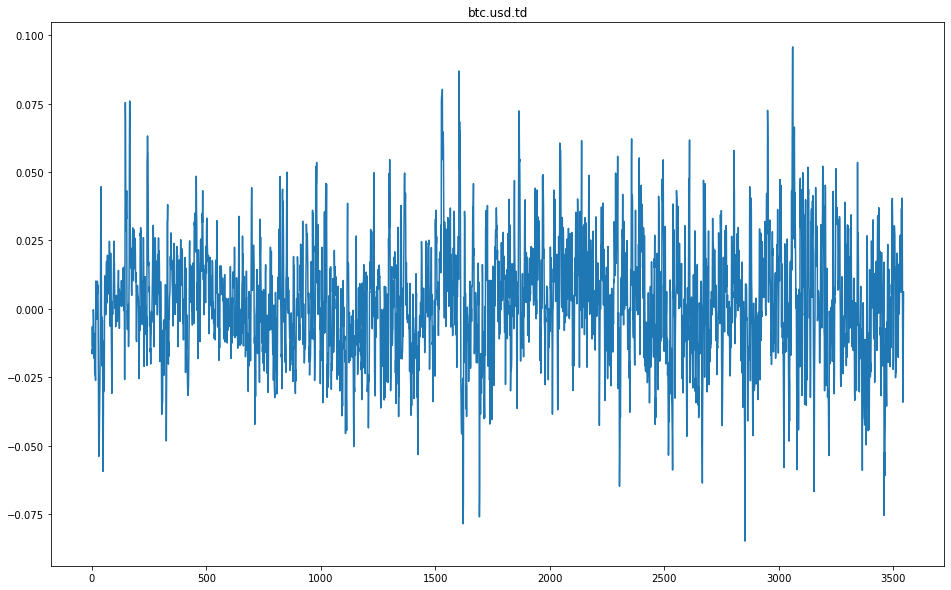

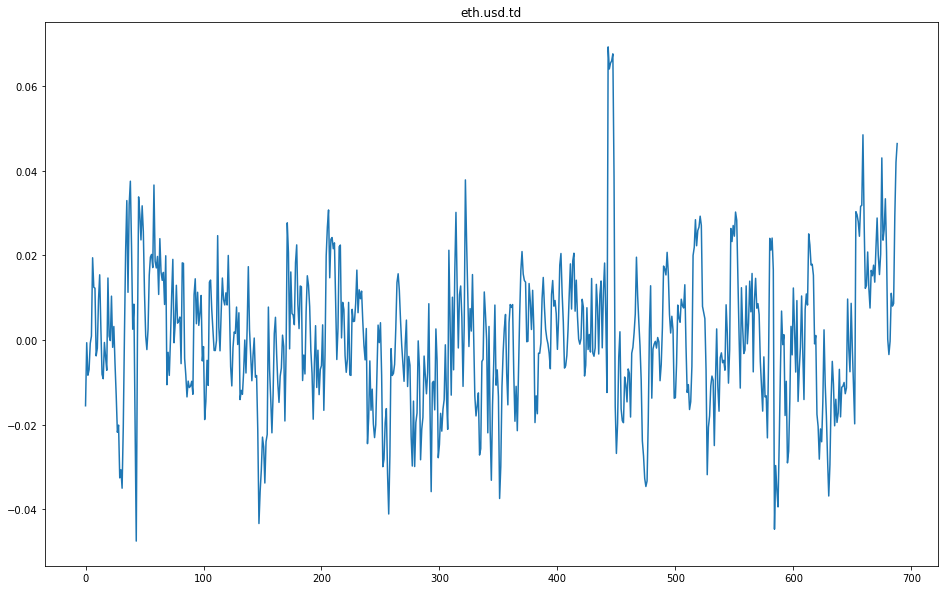

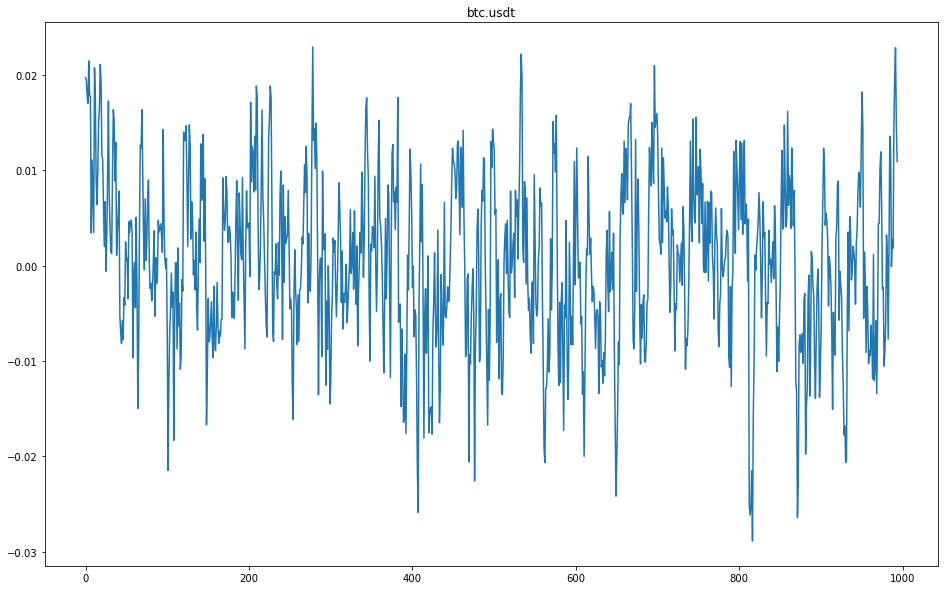

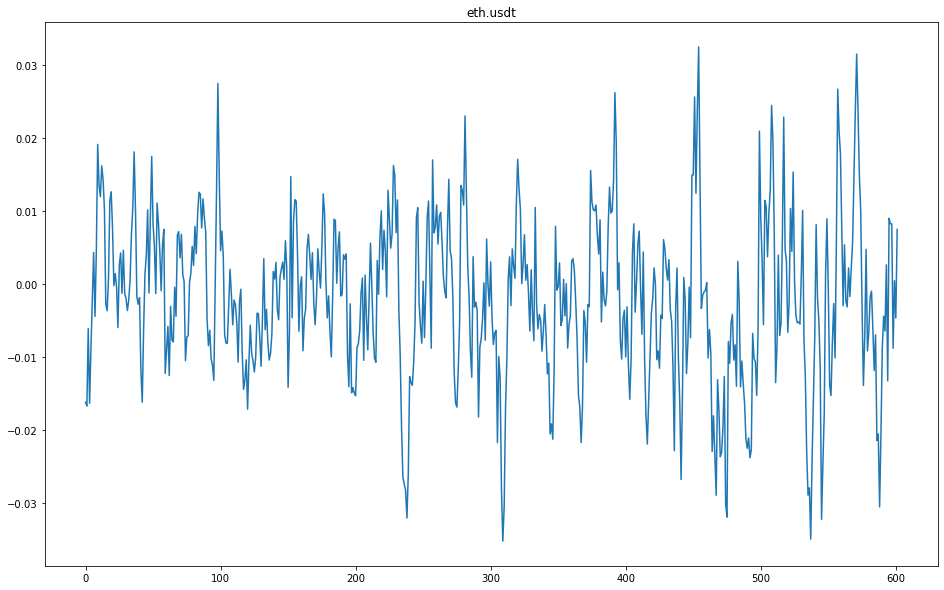

In [30]:
i = 0
for product in product_list:
    all_dates = os.listdir(DATA_PATH + product)
    all_signal = get_all_signal(np.array(all_dates), product, "dbook."+str(period), period, HEAD_PATH, SAVE_PATH)
    i = i+1
    plt.figure(i, figsize=(16, 10))
    plt.title(product)
    plt.plot(all_signal)

In [32]:
print(len(all_signal))
## 602


602


- there is no extreme values

In [74]:
from collections import OrderedDict
import itertools
open_list = np.arange(0.02, 0.04, 0.001)
thre_list = []
for cartesian in itertools.product(open_list, np.array([0.2, 0.4, 0.6, 0.8, 1.0])):
    thre_list.append((cartesian[0], -cartesian[0] * cartesian[1]))
thre_list = np.array(thre_list)
bitmex_thre_mat = pd.DataFrame(data=OrderedDict([("open", thre_list[:, 0]), ("close", thre_list[:, 1])]))


from collections import OrderedDict
import itertools
open_list = np.arange(0.01, 0.03, 0.001)
thre_list = []
for cartesian in itertools.product(open_list, np.array([0.2, 0.4, 0.6, 0.8, 1.0])):
    thre_list.append((cartesian[0], -cartesian[0] * cartesian[1]))
thre_list = np.array(thre_list)
binance_thre_mat = pd.DataFrame(data=OrderedDict([("open", thre_list[:, 0]), ("close", thre_list[:, 1])]))


- get the result of training sample

In [75]:
%%time
signal_name = "dbook."+str(period)
all_trade_stat = dict([])
SAVE_PATH = "e:/intern"
for product in product_list:
    spread = product_info[product]["spread"]
    tranct = product_info[product]["tranct"]
    tranct_ratio = product_info[product]["tranct.ratio"]
    all_dates = list(map(lambda x: x,os.listdir(DATA_PATH + product)))
    n_days = len(all_dates)
    if (product=="btc.usd.td" or product=="eth.usd.td"):
        thre_mat = bitmex_thre_mat
    elif (product=="btc.usdt" or product=="eth.usdt"):
        thre_mat = binance_thre_mat
    with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
        f_par = functools.partial(get_signal_pnl, product=product, signal_name=signal_name, thre_mat=thre_mat,
                                 reverse=1, tranct=tranct, max_spread=spread*1.1, tranct_ratio=tranct_ratio, 
                                  HEAD_PATH=HEAD_PATH, SIGNAL_PATH=SAVE_PATH, atr_filter=20/spread)
        result = compute([delayed(f_par)(file) for file in all_dates])[0]
    trade_stat = get_hft_summary(result, thre_mat, n_days)
    all_trade_stat[product] = trade_stat

#Wall time: 52min 47s


Wall time: 52min 47s


In [76]:
## save backtest result
save(all_trade_stat, SAVE_PATH+"/"+"all_trade_stat_"+signal_name+".pkl")

In [77]:
all_trade_stat = load(SAVE_PATH+"/"+"all_trade_stat_"+signal_name+".pkl")

- get the statistics result of training sample

- let's see how many good signals there are

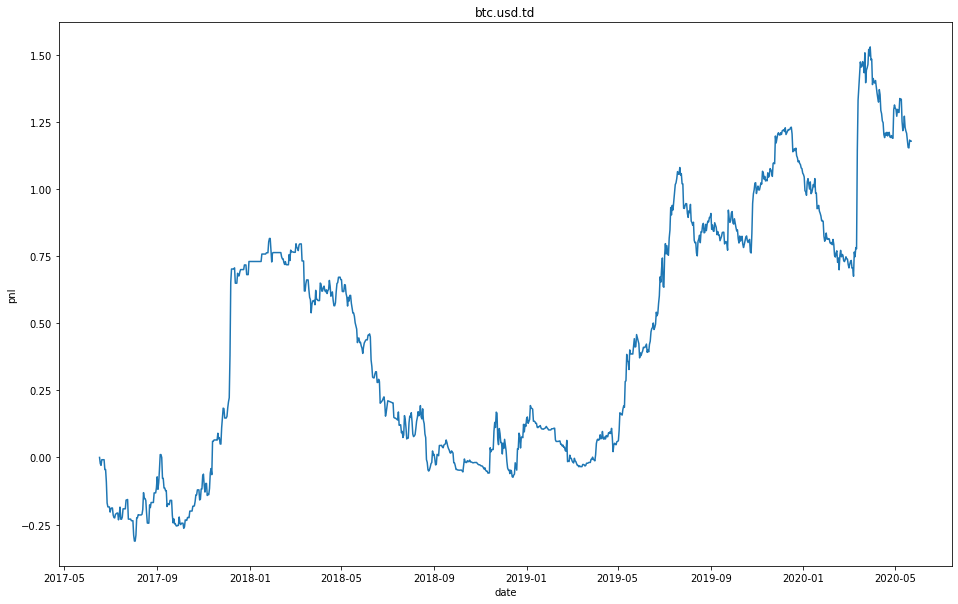

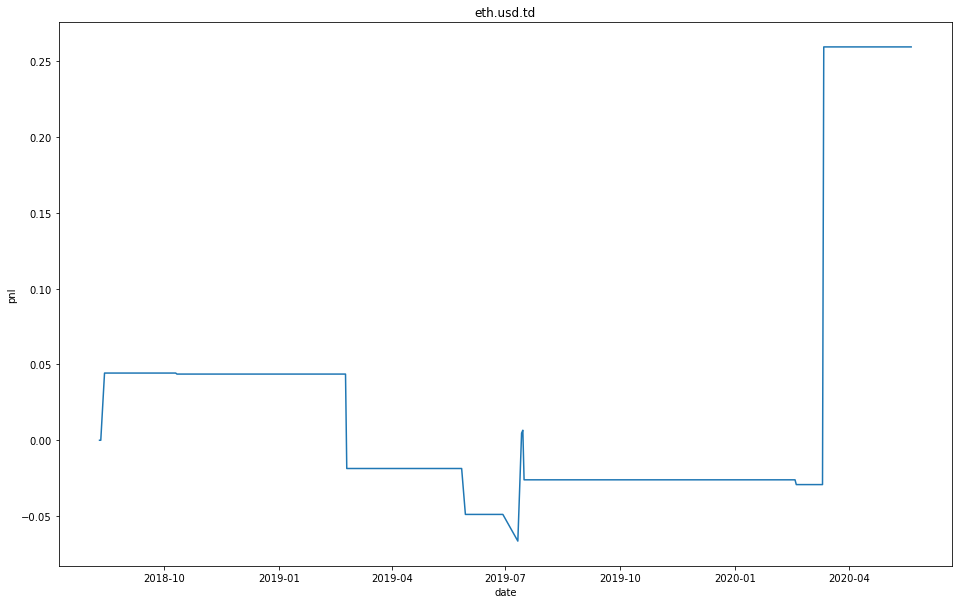

In [86]:
i = 0
for product in product_list:
    spread = product_info[product]["spread"]
    trade_stat = all_trade_stat[product]
    tranct = product_info[product]["tranct"]
    tranct_ratio = product_info[product]["tranct.ratio"]
    good_strat = trade_stat["final.result"]["avg.pnl"]>2*spread
    date_str = [n[0:10] for n in all_dates]
    format_dates = np.array([pd.to_datetime(d) for d in date_str])
    if sum(good_strat)>1:
        good_pnl = trade_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
        i = i+1
        plt.figure(i, figsize=(16, 10));
        plt.title("");
        plt.xlabel("date");
        plt.ylabel("pnl");
        plt.title(product);
        plt.plot(format_dates, good_pnl.cumsum());

- we can see the result is quite good
- now we can split the samples into training and testing sets

In [91]:
%%time
train_trade_stat = dict([])
for product in product_list:
    spread = product_info[product]["spread"]
    tranct = product_info[product]["tranct"]
    tranct_ratio = product_info[product]["tranct.ratio"]
    all_dates = np.array(list(map(lambda x: x,os.listdir(DATA_PATH + product))))
    all_dates = all_dates[all_dates<"2020-01-01"]
    date_str = [n[0:10] for n in all_dates]
    format_dates = np.array([pd.to_datetime(d) for d in date_str])
    n_days = len(all_dates)
    if (product=="btc.usd.td" or product=="eth.usd.td"):
        thre_mat = bitmex_thre_mat
        reverse = 1
    elif (product=="btc.usdt" or product=="eth.usdt"):
        thre_mat = binance_thre_mat
        reverse = -1
    with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
        f_par = functools.partial(get_signal_pnl, product=product, signal_name=signal_name, thre_mat=thre_mat,
                                 reverse=reverse, tranct=tranct, max_spread=spread*1.1, tranct_ratio=tranct_ratio, 
                                 HEAD_PATH=HEAD_PATH, SIGNAL_PATH=SAVE_PATH,
                                  atr_filter=20/spread)
        result = compute([delayed(f_par)(file) for file in all_dates])[0]
    trade_stat = get_hft_summary(result, thre_mat, len(all_dates))
    train_trade_stat[product] = trade_stat
    
## Wall time: 37min 17s

Wall time: 37min 17s


In [97]:
save(train_trade_stat, SAVE_PATH+"/" + signal_name+"_train_trade_stat.pkl")

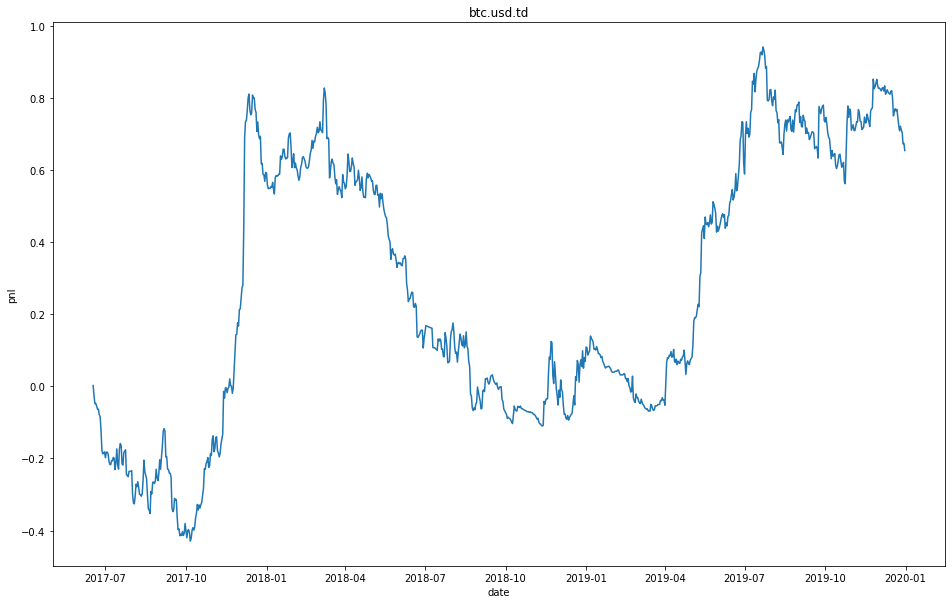

In [98]:
i = 0
train_trade_stat = load(SAVE_PATH+"/" + signal_name +"_train_trade_stat.pkl")
for product in product_list:
    spread = product_info[product]["spread"]
    trade_stat = train_trade_stat[product]
    good_strat = (trade_stat["final.result"]["avg.pnl"]>2) & (trade_stat["final.result"]["num"]>20)
    all_dates = np.array(list(map(lambda x: x,os.listdir(DATA_PATH + product))))
    date_str = [n[0:10] for n in all_dates]
    format_dates = np.array([pd.to_datetime(d) for d in date_str])
    train_sample = all_dates<"2020-01-01"
    if sum(good_strat)>0:
        good_pnl = trade_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
        i = i+1
        plt.figure(i, figsize=(16, 10));
        plt.title("");
        plt.xlabel("date");
        plt.ylabel("pnl");
        plt.title(product);
        plt.plot(format_dates[train_sample], good_pnl.cumsum());

In [99]:
%%time
test_trade_stat = dict([])
for product in product_list:
    spread = product_info[product]["spread"]
    tranct = product_info[product]["tranct"]
    tranct_ratio = product_info[product]["tranct.ratio"]
    all_dates = np.array(list(map(lambda x: x,os.listdir(DATA_PATH + product))))
    all_dates = all_dates[all_dates>="2020-01-01"]
    date_str = [n[0:10] for n in all_dates]
    format_dates = np.array([pd.to_datetime(d) for d in date_str])
    n_days = len(all_dates)
    if (product=="btc.usd.td" or product=="eth.usd.td"):
        thre_mat = bitmex_thre_mat
        reverse = 1
    elif (product=="btc.usdt" or product=="eth.usdt"):
        thre_mat = binance_thre_mat
        reverse = -1
    with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
        f_par = functools.partial(get_signal_pnl, product=product, signal_name=signal_name, thre_mat=thre_mat,
                                 reverse=reverse, tranct=tranct, max_spread=spread*1.1, tranct_ratio=tranct_ratio, 
                                 HEAD_PATH=HEAD_PATH, SIGNAL_PATH=SAVE_PATH,
                                  atr_filter=20/spread)
        result = compute([delayed(f_par)(file) for file in all_dates])[0]
    trade_stat = get_hft_summary(result, thre_mat, len(all_dates))
    test_trade_stat[product] = trade_stat
    
## Wall time:  16min 58s

Wall time: 16min 58s


In [101]:
save(test_trade_stat, SAVE_PATH+"/" + signal_name+"_test_trade_stat.pkl")

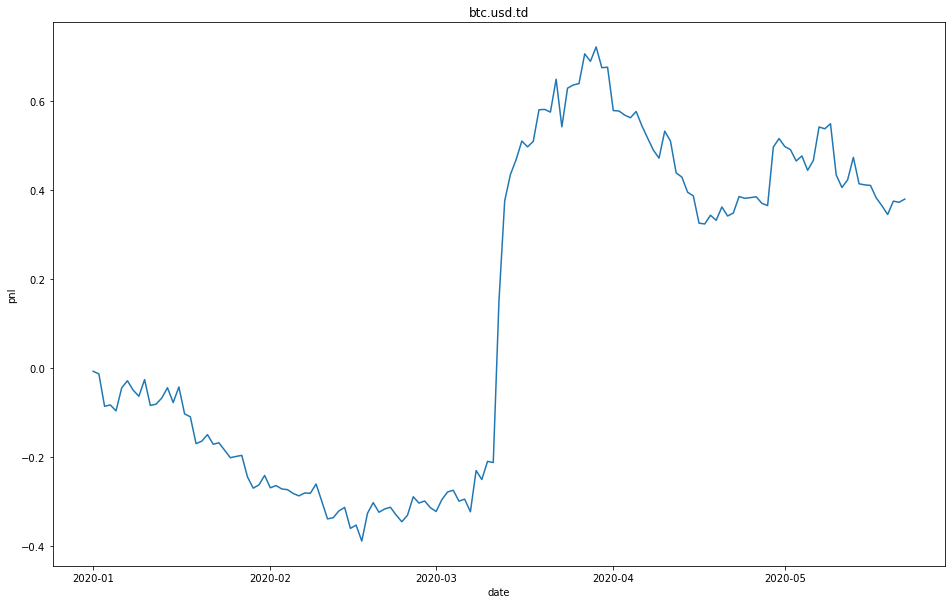

In [103]:
i = 0
test_trade_stat = load(SAVE_PATH+"/" + signal_name +"_test_trade_stat.pkl")
train_trade_stat = load(SAVE_PATH+"/" + signal_name +"_test_trade_stat.pkl")
for product in product_list:
    spread = product_info[product]["spread"]
    trade_stat = train_trade_stat[product]
    good_strat = (trade_stat["final.result"]["avg.pnl"]>2) & (trade_stat["final.result"]["num"]>20)
    trade_stat = test_trade_stat[product]
    all_dates = np.array(list(map(lambda x: x,os.listdir(DATA_PATH + product))))
    date_str = [n[0:10] for n in all_dates]
    format_dates = np.array([pd.to_datetime(d) for d in date_str])
    test_sample = all_dates>="2020-01-01"
    if sum(good_strat)>0:
        good_pnl = trade_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
        i = i+1
        plt.figure(i, figsize=(16, 10));
        plt.title("");
        plt.xlabel("date");
        plt.ylabel("pnl");
        plt.title(product);
        plt.plot(format_dates[test_sample], good_pnl.cumsum());

- at last we plot the selected pnl

- we can check its sharp ratio

- now let's check how it performs on the test set

- now we see the pnl curve

possible solution:
- choose strategies not based on performance, we can limit the parameters to a small range, and use risk parity to allocate weights to all of them;
- we can use Bayesian Optimization to choose parameters automatically to avoid humen intervention;
- maybe adding i can make the strategies break new high recently

we can try these solutions in the future

- at last we plot the selected pnl

- now we can combine all of these to a function

In [107]:
reverse_list = dict([])
reverse_list["btc.usd.td"] = 1
reverse_list["eth.usd.td"] = 1
reverse_list["btc.usdt"] = 1
reverse_list["eth.usdt"] = 1

In [108]:
atr_filter_list = dict([])
atr_filter_list["btc.usd.td"] =  20
atr_filter_list["eth.usd.td"] = 20
atr_filter_list["btc.usdt"] = 200
atr_filter_list["eth.usdt"] = 200

In [109]:
thre_mat_list = dict([])
thre_mat_list["btc.usd.td"] = bitmex_thre_mat
thre_mat_list["eth.usd.td"] = bitmex_thre_mat
thre_mat_list["btc.usdt"] = binance_thre_mat
thre_mat_list["eth.usdt"] = binance_thre_mat

In [114]:
thre_mat_list["eth.usd.td"]

,open,close
0,0.020,-0.0040
1,0.020,-0.0080
2,0.020,-0.0120
3,0.020,-0.0160
4,0.020,-0.0200
...,...,...
95,0.039,-0.0078
96,0.039,-0.0156
97,0.039,-0.0234
98,0.039,-0.0312


In [137]:
split_str = "2020-01-01"
product = "eth.usd.td"
all_dates = np.array(list(map(lambda x: x,os.listdir(DATA_PATH + product))))
train_sample = np.array(all_dates)<split_str ## training samples
test_sample = np.array(all_dates)>split_str ## test samples
date_str = [n[0:10] for n in all_dates] ## date string
spread = product_info[product]["spread"] ## get product's bid/ask spread
tranct = product_info[product]["tranct"] ## get product's transaction cost
tranct_ratio = product_info[product]["tranct.ratio"] ## True: tranct cost based on notional; False: fix cost
thre_mat = thre_mat_list[product]
reverse = reverse_list[product]
atr_filter = atr_filter_list[product]

In [138]:
sum(train_sample)

173

In [143]:
## get backtest result of a signal on a product's list
from collections import OrderedDict
def get_list_signal_stat(signal_name, thre_mat_list, product_list, atr_filter_list,
                    split_str="2018", min_pnl=2, min_num=20, reverse=1):
    CORE_NUM = int(os.environ['NUMBER_OF_PROCESSORS'])
    train_trade_stat = dict([]) ## training result statistics
    print("training")
    for product in product_list:
        print(product)
        all_dates = np.array(list(map(lambda x: x,os.listdir(DATA_PATH + product))))
        train_sample = np.array(all_dates)<split_str ## training samples
        test_sample = np.array(all_dates)>split_str ## test samples
        print(sum(train_sample), sum(test_sample))
        date_str = [n[0:10] for n in all_dates] ## date string
        format_dates = np.array([pd.to_datetime(d) for d in date_str]) ## date in xxxx-xx-xx format
        spread = product_info[product]["spread"] ## get product's bid/ask spread
        tranct = product_info[product]["tranct"] ## get product's transaction cost
        tranct_ratio = product_info[product]["tranct.ratio"] ## True: tranct cost based on notional; False: fix cost
        thre_mat = thre_mat_list[product]
        reverse = reverse_list[product]
        atr_filter = atr_filter_list[product]
        with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
            f_par = functools.partial(get_signal_pnl, product=product, signal_name=signal_name, thre_mat=thre_mat,
                                      reverse=reverse, tranct=tranct, max_spread=spread*1.1, tranct_ratio=tranct_ratio, 
                                      HEAD_PATH=HEAD_PATH, SIGNAL_PATH=SAVE_PATH, atr_filter=atr_filter)
            train_result = compute([delayed(f_par)(file) for file in np.array(all_dates)[train_sample]])[0]
        trade_stat = get_hft_summary(train_result, thre_mat, sum(train_sample))
        train_trade_stat[product] = trade_stat
    print("testing")
    test_trade_stat = dict([])
    for product in product_list:
        all_dates = np.array(list(map(lambda x: x,os.listdir(DATA_PATH + product))))
        print(product)
        train_sample = np.array(all_dates)<split_str ## training samples
        test_sample = np.array(all_dates)>split_str ## test samples
        date_str = [n[0:10] for n in all_dates] ## date string
        format_dates = np.array([pd.to_datetime(d) for d in date_str]) ## date in xxxx-xx-xx format
        thre_mat = thre_mat_list[product]
        spread = product_info[product]["spread"] ## get product's bid/ask spread
        tranct = product_info[product]["tranct"] ## get product's transaction cost
        tranct_ratio = product_info[product]["tranct.ratio"] ## True: tranct cost based on notional; False: fix cost        
        reverse = reverse_list[product]
        atr_filter = atr_filter_list[product]
        with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
            f_par = functools.partial(get_signal_pnl, product=product, signal_name=signal_name, thre_mat=thre_mat,
                                     reverse=reverse, tranct=tranct, max_spread=spread*1.1, tranct_ratio=tranct_ratio,
                                      HEAD_PATH = HEAD_PATH, SIGNAL_PATH=SAVE_PATH,atr_filter=atr_filter)
            result = compute([delayed(f_par)(file) for file in np.array(all_dates)[test_sample]])[0]
        trade_stat = get_hft_summary(result, thre_mat, sum(test_sample))
        test_trade_stat[product] = trade_stat
    result=dict([])
    result["train_trade_stat"] = train_trade_stat ## save train stat
    result["test_trade_stat"] = test_trade_stat ## save test stat
    if reverse==-1:
        save(result, HEAD_PATH+"/"+signal_name+".result.pkl") ## reversal strategy
    else:
        save(result, HEAD_PATH+"/"+signal_name+".pos.result.pkl") ## trend strategy

In [147]:
## get train and test result, choose good strategies, plot the portfolio and result of each product

def get_list_signal_result(signal_name, product_list, split_str="2018", reverse=1,
                           min_pnl=2, min_num=20, atr_filter=20):
    if reverse==-1:
        result = load(HEAD_PATH+"/"+signal_name+".result.pkl") ## load reversal strat statistics
    else:
        result = load(HEAD_PATH+"/"+signal_name+".pos.result.pkl") ## load trend strat statistics
    train_trade_stat = result["train_trade_stat"]
    test_trade_stat = result["test_trade_stat"]
    train_sample = np.array(all_dates)<split_str
    test_sample = np.array(all_dates)>split_str
    date_str = [n[0:10] for n in all_dates]
    format_dates = np.array([pd.to_datetime(d) for d in date_str])
    i = 0
    for product in product_list:
        spread = product_info[product]["spread"]
        trade_stat = train_trade_stat[product]
        ## two criterion: minimum averge pnl (unit is spread), monimum number of trades
        good_strat = (trade_stat["final.result"]["avg.pnl"]>min_pnl*spread) & (trade_stat["final.result"]["num"]>min_num)
        if sum(good_strat)>0:
            train_pnl = trade_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
            trade_stat = test_trade_stat[product]
            test_pnl = trade_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
            print(product, "train sharpe ", sharpe(train_pnl), "test sharpe ", sharpe(test_pnl))
            i = i+1

In [140]:
%%time
get_list_signal_stat("dbook.4096", thre_mat_list, product_list, atr_filter_list,
                     split_str="2020", min_pnl=2, min_num=20, reverse=1)

# training
# btc.usd.td
# 916 143
# eth.usd.td
# 173 43
# btc.usdt
# 105 138
# eth.usdt
# 34 138
# testing
# btc.usd.td
# eth.usd.td
# btc.usdt
# eth.usdt
# Wall time: 1h 15min 31s


training
btc.usd.td
916 143
eth.usd.td
173 43
btc.usdt
105 138
eth.usdt
34 138
testing
btc.usd.td
eth.usd.td
btc.usdt
eth.usdt
Wall time: 1h 15min 31s


In [148]:
get_list_signal_result("dbook.4096", product_list, split_str="2020", reverse=1,min_pnl=2, min_num=20, atr_filter=20)

# btc.usd.td train sharpe  0.17542904778716517 test sharpe  -0.2232329018774679
# eth.usd.td train sharpe  0.4550175068150746 test sharpe  1.7524166780829962
# btc.usdt train sharpe  0.13716497548657736 test sharpe  -1.4341601826322128



btc.usd.td train sharpe  0.17542904778716517 test sharpe  -0.2232329018774679
eth.usd.td train sharpe  0.4550175068150746 test sharpe  1.7524166780829962
btc.usdt train sharpe  0.13716497548657736 test sharpe  -1.4341601826322128


- we can test other signals

In [33]:
## any price is between minimum and maximum
## so if we use (price-min)/(max-min), the result is between [0,1]
## 0 is min, 1 is max
## then we subtract 0.5 from it
## then result is between -0.5 to 0.5
## and finally use ewma to take the average result over a range
from collections import OrderedDict
class foctor_range_pos_period(factor_template):
    factor_name = "range.pos.period"
    
    params = OrderedDict([
        ("period", np.power(2, range(10,13)))
    ])
    
    def formula(self, data, period):
        return get_range_pos(data["wpr"], data["min."+str(period)], data["max."+str(period)], period).values

In [34]:
def get_range_pos(wpr, min_period, max_period, period):
    return ewma(zero_divide(wpr-min_period, max_period-min_period), period, adjust=True) - 0.5


- let's see waht it looks like

In [35]:
x4_1 = foctor_range_pos_period()
## we've changed it a little bit from week 2 by adding
## xs.new <- gsub(para.name, value, xs)    
## aa <- with(data,eval(parse(text=xs.new)))
## so be aware that the name of parameter should be complex enough to avoid error

- now we can create path

In [36]:
for product in product_list:
    create_signal_path(x4_1, product, SAVE_PATH)

e:/intern/tmp pkl/btc.usd.td/range.pos.1024
e:/intern/tmp pkl/btc.usd.td/range.pos.2048
e:/intern/tmp pkl/btc.usd.td/range.pos.4096
e:/intern/tmp pkl/eth.usd.td/range.pos.1024
e:/intern/tmp pkl/eth.usd.td/range.pos.2048
e:/intern/tmp pkl/eth.usd.td/range.pos.4096
e:/intern/tmp pkl/btc.usdt/range.pos.1024
e:/intern/tmp pkl/btc.usdt/range.pos.2048
e:/intern/tmp pkl/btc.usdt/range.pos.4096
e:/intern/tmp pkl/eth.usdt/range.pos.1024
e:/intern/tmp pkl/eth.usdt/range.pos.2048
e:/intern/tmp pkl/eth.usdt/range.pos.4096


- then we calculate the signal

In [37]:
%%time
for product in product_list:
    file_list = list(map(lambda x: DATA_PATH+product+"/"+x, os.listdir(DATA_PATH + product)))
    parLapply(CORE_NUM, file_list, build_composite_signal,signal_list=x4_1, product=product, HEAD_PATH=SAVE_PATH,n=14)
;

# Wall time:  23min 12s

Wall time: 23min 12s


''

- then we can see how the signal looks like

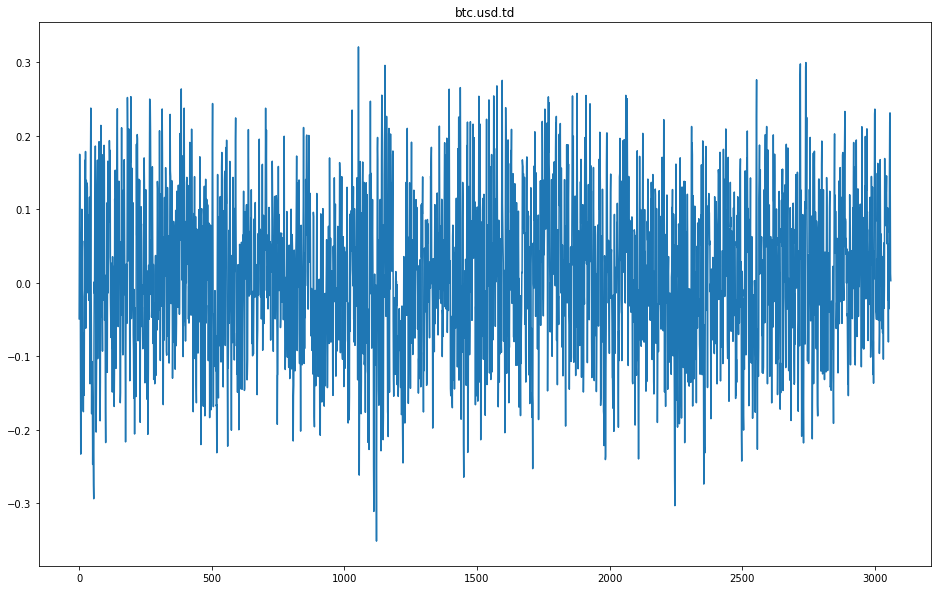

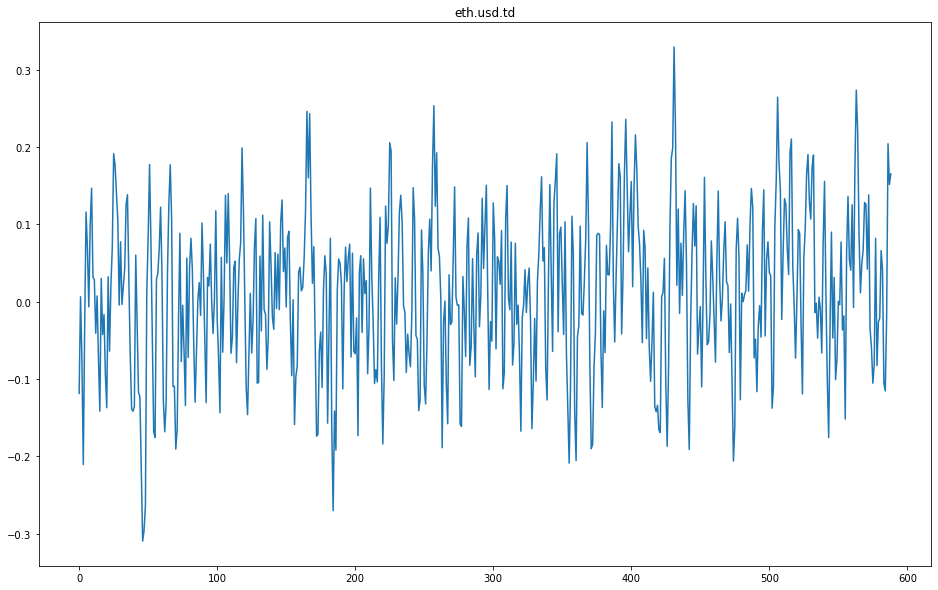

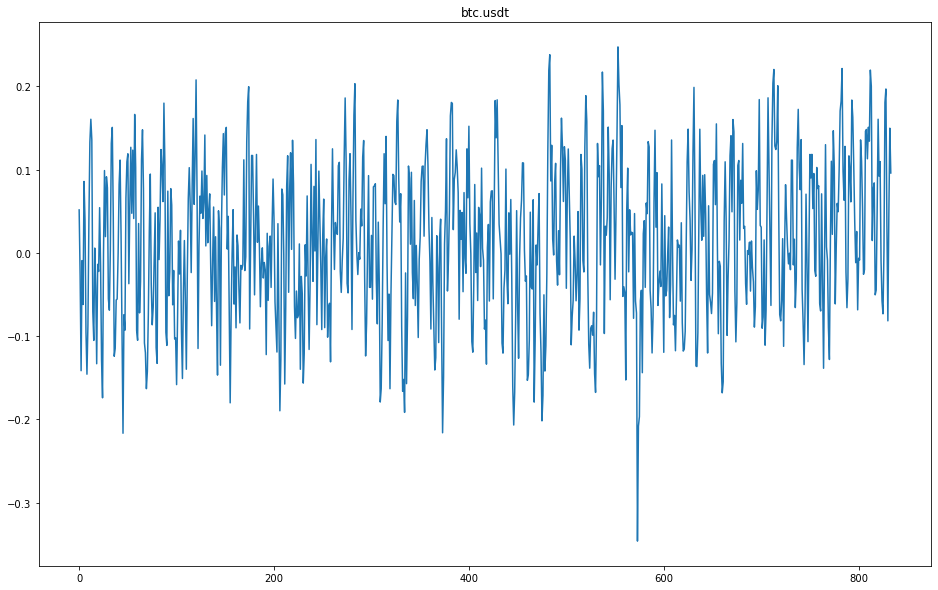

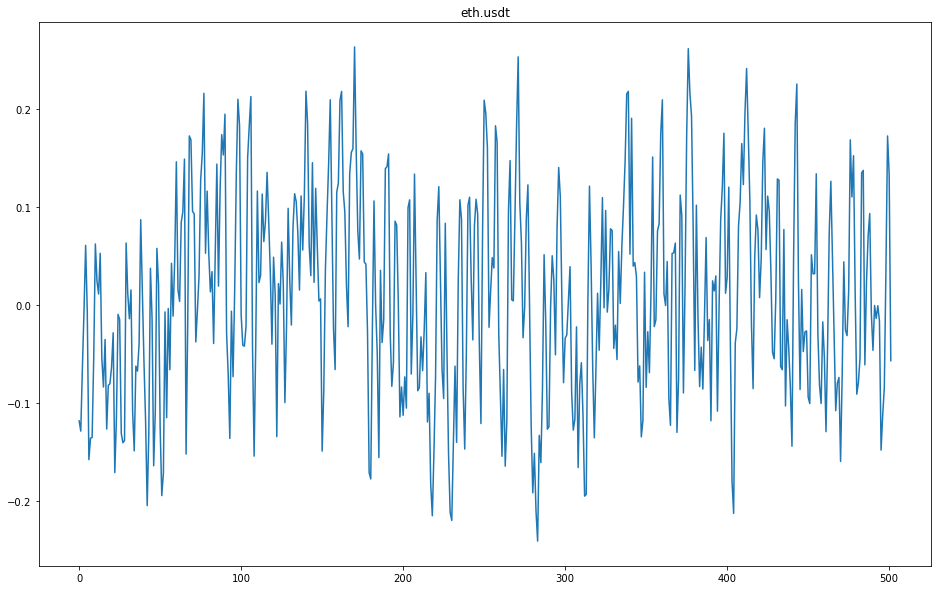

In [159]:
i = 0
for product in product_list:
    all_dates = os.listdir(DATA_PATH + product)
    all_signal = get_all_signal(np.array(all_dates), product, "range.pos."+str(period), period, HEAD_PATH, SAVE_PATH)
    i = i+1
    plt.figure(i, figsize=(16, 10))
    plt.title(product)
    plt.plot(all_signal)

- there is no extreme values

In [172]:
from collections import OrderedDict
import itertools
open_list = np.arange(0.1, 0.3, 0.01)
thre_list = []
for cartesian in itertools.product(open_list, np.array([0.2, 0.4, 0.6, 0.8, 1.0])):
    thre_list.append((cartesian[0], -cartesian[0] * cartesian[1]))
thre_list = np.array(thre_list)
thre_mat = pd.DataFrame(data=OrderedDict([("open", thre_list[:, 0]), ("close", thre_list[:, 1])]))
np.shape(thre_mat)
thre_mat_list = dict([])
for product in product_list:
    thre_mat_list[product] = thre_mat

In [163]:
%%time
get_list_signal_stat("range.pos.4096", thre_mat_list, product_list, atr_filter_list,
                     split_str="2020", min_pnl=2, min_num=20, reverse=1)


# training
# btc.usd.td
# 916 143
# eth.usd.td
# 173 43
# btc.usdt
# 105 138
# eth.usdt
# 34 138
# testing
# btc.usd.td
# eth.usd.td
# btc.usdt
# eth.usdt
# Wall time: 57min 4s





training
btc.usd.td
916 143
eth.usd.td
173 43
btc.usdt
105 138
eth.usdt
34 138
testing
btc.usd.td
eth.usd.td
btc.usdt
eth.usdt
Wall time: 57min 4s


In [165]:
signal_stat = get_list_signal_result("range.pos.4096", product_list, reverse=1, 
                                   min_pnl=2, min_num=10)

# btc.usd.td train sharpe  0.7138308971459896 test sharpe  0.7025460939268738
# eth.usd.td train sharpe  1.8410955434891758 test sharpe  2.1192720910385776
# btc.usdt train sharpe  1.089827338429585 test sharpe  0.05987289149813357
# eth.usdt train sharpe  0.8958512807121835 test sharpe  -0.29445764110324035


btc.usd.td train sharpe  0.7138308971459896 test sharpe  0.7025460939268738
eth.usd.td train sharpe  1.8410955434891758 test sharpe  2.1192720910385776
btc.usdt train sharpe  1.089827338429585 test sharpe  0.05987289149813357
eth.usdt train sharpe  0.8958512807121835 test sharpe  -0.29445764110324035


In [38]:
## double moving average
## long is perio,d short is round(period/10)
## we can use this idea to consturct many combinations
from collections import OrderedDict
class foctor_ma_diff_period(factor_template):
    factor_name = "ma.dif.10.period"
    
    params = OrderedDict([
        ("period", np.power(2, range(10,13)))
    ])
    
    def formula(self, data, period):
        return zero_divide(ewma(data["wpr"], round(period/10), adjust=True) - ewma(data["wpr"], period, adjust=True), data["wpr"]).values

In [39]:
x99_1 = foctor_ma_diff_period()

In [40]:
for product in product_list:
    create_signal_path(x99_1, product, SAVE_PATH)

e:/intern/tmp pkl/btc.usd.td/ma.dif.10.1024
e:/intern/tmp pkl/btc.usd.td/ma.dif.10.2048
e:/intern/tmp pkl/btc.usd.td/ma.dif.10.4096
e:/intern/tmp pkl/eth.usd.td/ma.dif.10.1024
e:/intern/tmp pkl/eth.usd.td/ma.dif.10.2048
e:/intern/tmp pkl/eth.usd.td/ma.dif.10.4096
e:/intern/tmp pkl/btc.usdt/ma.dif.10.1024
e:/intern/tmp pkl/btc.usdt/ma.dif.10.2048
e:/intern/tmp pkl/btc.usdt/ma.dif.10.4096
e:/intern/tmp pkl/eth.usdt/ma.dif.10.1024
e:/intern/tmp pkl/eth.usdt/ma.dif.10.2048
e:/intern/tmp pkl/eth.usdt/ma.dif.10.4096


In [41]:
%%time
for product in product_list:
    print(product)
    file_list = list(map(lambda x: DATA_PATH+product+"/"+x, os.listdir(DATA_PATH + product)))
    parLapply(CORE_NUM, file_list, build_composite_signal,signal_list=x99_1, product=product, HEAD_PATH=SAVE_PATH, n=14)
;

# btc.usd.td
# eth.usd.td
# btc.usdt
# eth.usdt
# Wall time: 24min 24s


btc.usd.td
eth.usd.td
btc.usdt
eth.usdt
Wall time: 24min 24s


''

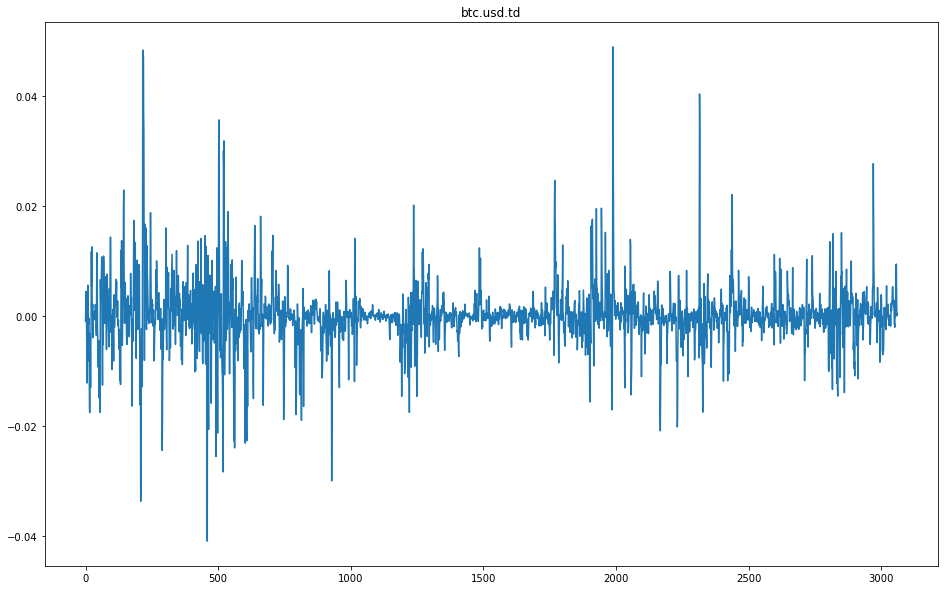

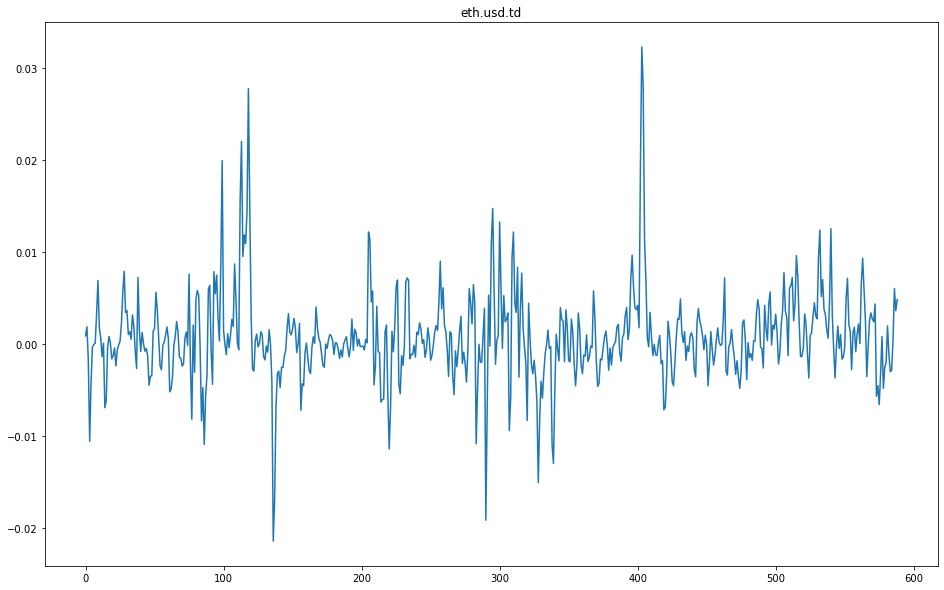

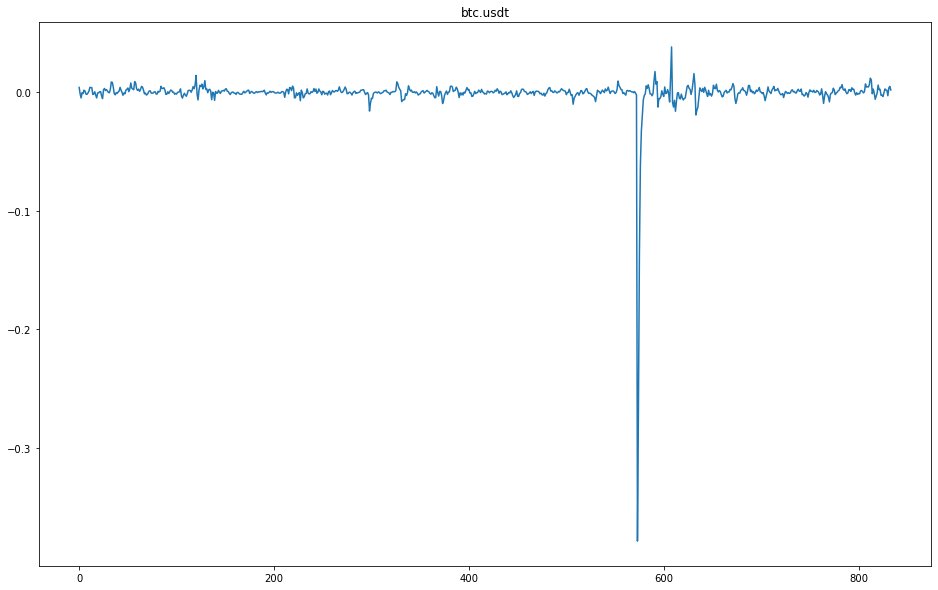

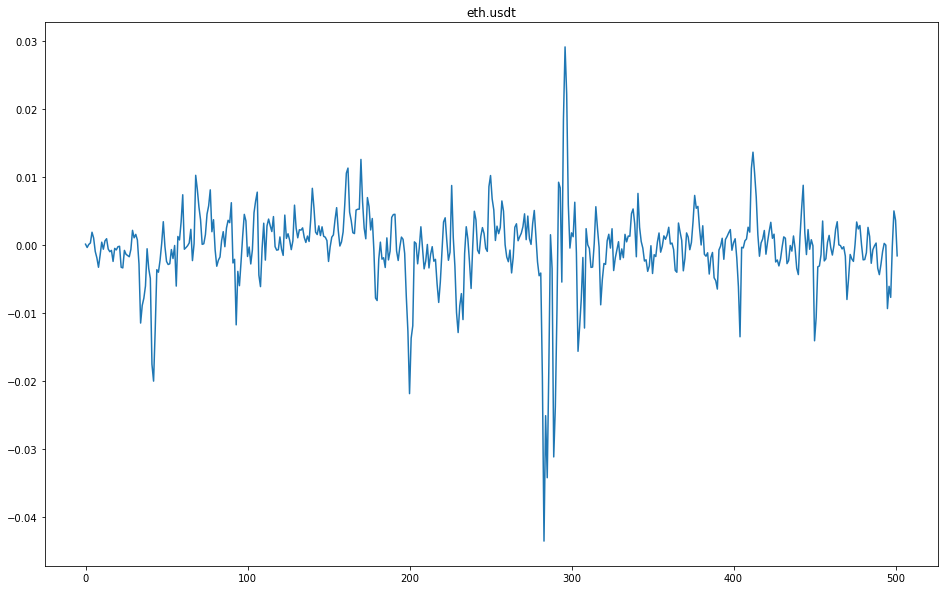

In [171]:
i = 0
period = 4096
for product in product_list:
    all_dates = os.listdir(DATA_PATH + product)
    all_signal = get_all_signal(np.array(all_dates), product, "ma.dif.10."+str(period), period,HEAD_PATH,SAVE_PATH)
    i = i+1
    plt.figure(i, figsize=(16, 10))
    plt.title(product)
    plt.plot(all_signal)

In [173]:
from collections import OrderedDict
import itertools
open_list = np.arange(0.01, 0.03, 0.001)
thre_list = []
for cartesian in itertools.product(open_list, np.array([0.2, 0.4, 0.6, 0.8, 1.0])):
    thre_list.append((cartesian[0], -cartesian[0] * cartesian[1]))
thre_list = np.array(thre_list)
thre_mat = pd.DataFrame(data=OrderedDict([("open", thre_list[:, 0]), ("close", thre_list[:, 1])]))
np.shape(thre_mat)
thre_mat_list = dict([])
for product in product_list:
    thre_mat_list[product] = thre_mat

In [174]:
%%time
get_list_signal_stat("ma.dif.10.4096", thre_mat_list, product_list, atr_filter_list,
                     split_str="2020", min_pnl=2, min_num=20, reverse=1)

# training
# btc.usd.td
# 916 143
# eth.usd.td
# 173 43
# btc.usdt
# 105 138
# eth.usdt
# 34 138
# testing
# btc.usd.td
# eth.usd.td
# btc.usdt
# eth.usdt
# Wall time: 30min 5s


training
btc.usd.td
916 143
eth.usd.td
173 43
btc.usdt
105 138
eth.usdt
34 138
testing
btc.usd.td
eth.usd.td
btc.usdt
eth.usdt
Wall time: 30min 5s


In [175]:
signal_stat = get_list_signal_result("ma.dif.10.4096", product_list, reverse=1, 
                                   min_pnl=2, min_num=20)

# btc.usdt train sharpe  0.5776061003976157 test sharpe  -1.7813740238446254
# eth.usdt train sharpe  1.6678303937088697 test sharpe  -3.0618136573533676




btc.usdt train sharpe  0.5776061003976157 test sharpe  -1.7813740238446254
eth.usdt train sharpe  1.6678303937088697 test sharpe  -3.0618136573533676


In [42]:
## similar to double ewma
## but divided by price range
## and short period is round(period/20)
## for exampl.e period/2, period/4, period/8...
## now period = 4096 =2^12, 
from collections import OrderedDict
class foctor_price_osci_period(factor_template):
    factor_name = "price.osci.period"
    
    params = OrderedDict([
        ("period", np.power(2, range(10,13)))
    ])
    
    def formula(self, data, period):
        return zero_divide(ewma(data["wpr"], round(period/20), adjust=True)-ewma(data["wpr"], period, adjust=True), data["max."+str(period)]-data["min."+str(period)]).values

In [43]:
x113 = foctor_price_osci_period()
for product in product_list:
    create_signal_path(x113, product, SAVE_PATH)

e:/intern/tmp pkl/btc.usd.td/price.osci.1024
e:/intern/tmp pkl/btc.usd.td/price.osci.2048
e:/intern/tmp pkl/btc.usd.td/price.osci.4096
e:/intern/tmp pkl/eth.usd.td/price.osci.1024
e:/intern/tmp pkl/eth.usd.td/price.osci.2048
e:/intern/tmp pkl/eth.usd.td/price.osci.4096
e:/intern/tmp pkl/btc.usdt/price.osci.1024
e:/intern/tmp pkl/btc.usdt/price.osci.2048
e:/intern/tmp pkl/btc.usdt/price.osci.4096
e:/intern/tmp pkl/eth.usdt/price.osci.1024
e:/intern/tmp pkl/eth.usdt/price.osci.2048
e:/intern/tmp pkl/eth.usdt/price.osci.4096


In [44]:
%%time
for product in product_list:
    file_list = list(map(lambda x: DATA_PATH+product+"/"+x, os.listdir(DATA_PATH + product)))
    parLapply(CORE_NUM, file_list, build_composite_signal,signal_list=x113, product=product, HEAD_PATH=SAVE_PATH, n=14)
;
# Wall time: 24min 33s

Wall time: 24min 33s


''

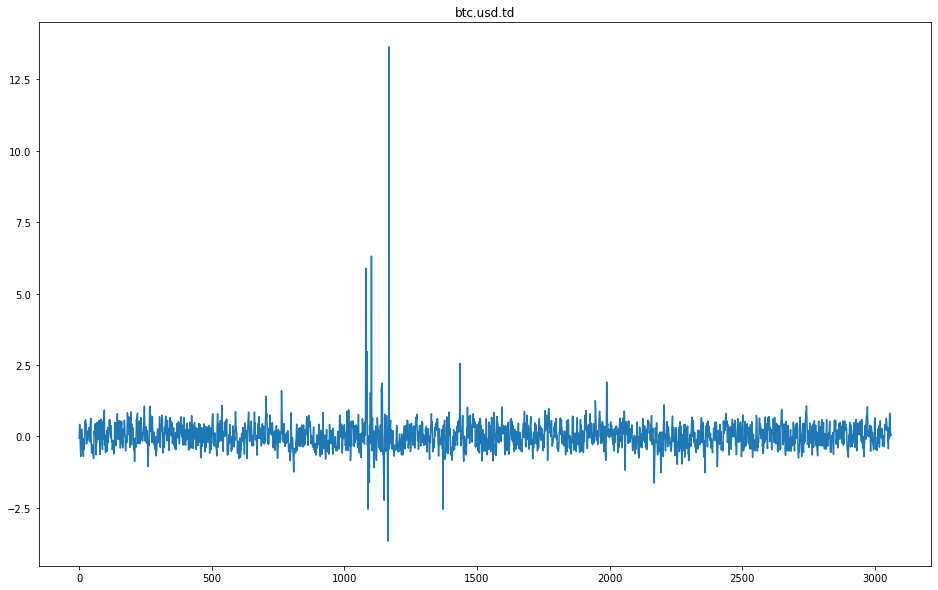

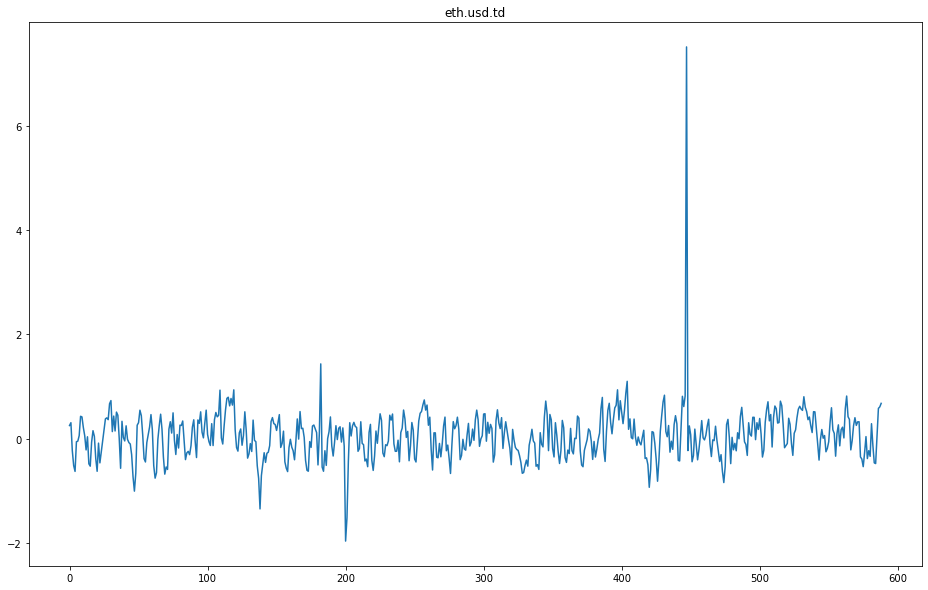

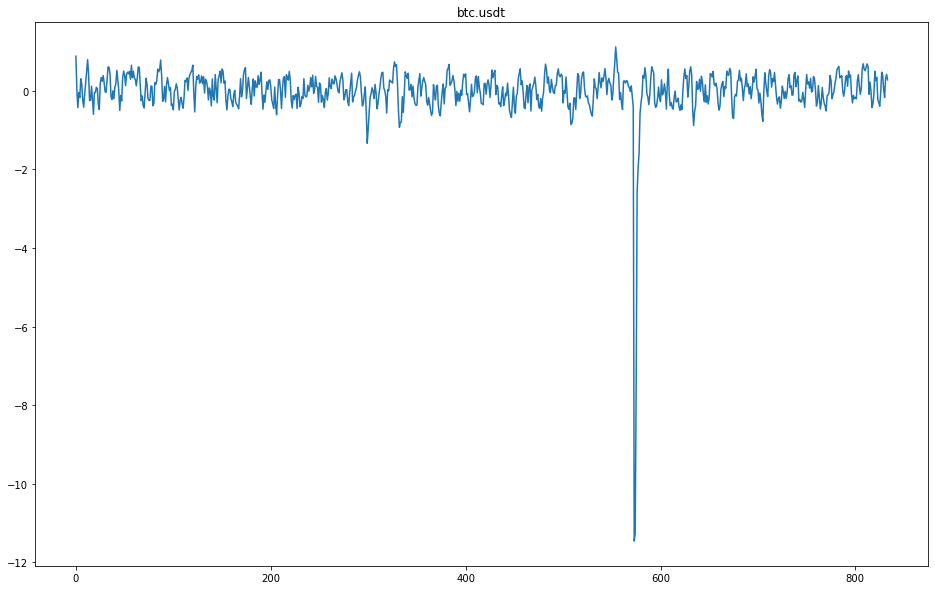

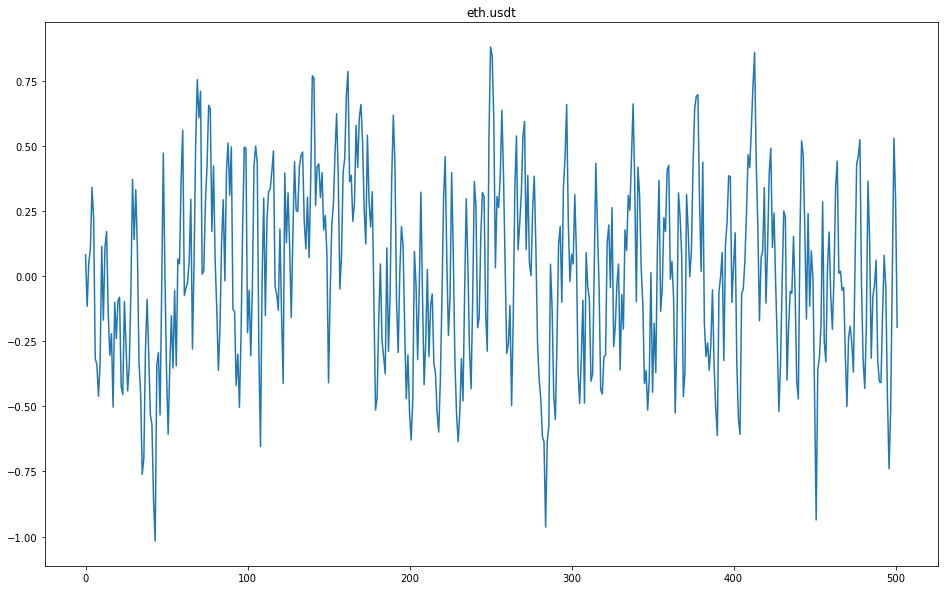

In [181]:
i = 0
period = 4096
for product in product_list:
    all_dates = os.listdir(DATA_PATH + product)
    all_signal = get_all_signal(np.array(all_dates), product, "price.osci."+str(period), period,HEAD_PATH,SAVE_PATH)
    i = i+1
    plt.figure(i, figsize=(16, 10))
    plt.title(product)
    plt.plot(all_signal)

- before the last signal, let's do some analysis of skewness and kurtosis

In [183]:
from collections import OrderedDict
import itertools
open_list = np.arange(0.6, 1, 0.02)
thre_list = []
for cartesian in itertools.product(open_list, np.array([0.2, 0.4, 0.6, 0.8, 1.0])):
    thre_list.append((cartesian[0], -cartesian[0] * cartesian[1]))
thre_list = np.array(thre_list)
thre_mat = pd.DataFrame(data=OrderedDict([("open", thre_list[:, 0]), ("close", thre_list[:, 1])]))
np.shape(thre_mat)
thre_mat_list = dict([])
for product in product_list:
    thre_mat_list[product] = thre_mat

In [184]:
%%time
get_list_signal_stat("price.osci.4096", thre_mat_list, product_list, atr_filter_list,
                     split_str="2020", min_pnl=2, min_num=20, reverse=1)

# training
# btc.usd.td
# 916 143
# eth.usd.td
# 173 43
# btc.usdt
# 105 138
# eth.usdt
# 34 138
# testing
# btc.usd.td
# eth.usd.td
# btc.usdt
# eth.usdt
# Wall time: 1h 8min 41s


training
btc.usd.td
916 143
eth.usd.td
173 43
btc.usdt
105 138
eth.usdt
34 138
testing
btc.usd.td
eth.usd.td
btc.usdt
eth.usdt
Wall time: 1h 8min 41s


In [185]:
%%time
signal_stat = get_list_signal_result("price.osci.4096", product_list, reverse=1, min_pnl=2, min_num=20)

# eth.usd.td train sharpe  0.9669986805079992 test sharpe  1.1070292837928755
# btc.usdt train sharpe  1.4100960521818062 test sharpe  0.5603286575308148
# eth.usdt train sharpe  1.3643767227878125 test sharpe  -2.0516727363978204
# Wall time: 99 ms



eth.usd.td train sharpe  0.9669986805079992 test sharpe  1.1070292837928755
btc.usdt train sharpe  1.4100960521818062 test sharpe  0.5603286575308148
eth.usdt train sharpe  1.3643767227878125 test sharpe  -2.0516727363978204
Wall time: 99 ms


In [194]:
from scipy.stats import kurtosis
from scipy.stats import skew
def get_signal_moment(signal, product_list, period):
    for product in product_list:
        all_dates = os.listdir(DATA_PATH + product)
        all_signal = get_all_signal(np.array(all_dates), product, signal+"."+str(period), period, SIGNAL_PATH=SAVE_PATH)
        print(product, "kurtosis=", kurtosis(all_signal, fisher=False), " skew=", skew(all_signal))

In [197]:
%%time
get_signal_moment("dbook", product_list, 4096)
# btc.usd.td kurtosis= 3.6648494878266105  skew= -0.1199995974789459
# eth.usd.td kurtosis= 3.4475825905024324  skew= 0.2679203840693615
# btc.usdt kurtosis= 3.7886906306699606  skew= -0.04445293772735142
# eth.usdt kurtosis= 3.2994222084860234  skew= 0.09142174717293237
# Wall time: 2min 42s


btc.usd.td kurtosis= 3.6648494878266105  skew= -0.1199995974789459
eth.usd.td kurtosis= 3.4475825905024324  skew= 0.2679203840693615
btc.usdt kurtosis= 3.7886906306699606  skew= -0.04445293772735142
eth.usdt kurtosis= 3.2994222084860234  skew= 0.09142174717293237
Wall time: 2min 21s


In [196]:
%%time
get_signal_moment("range.pos", product_list, 4096)

# btc.usd.td kurtosis= 2.6824846208713797  skew= 0.0030998001699363608
# eth.usd.td kurtosis= 2.8153599289286975  skew= -0.09030688752425066
# btc.usdt kurtosis= 2.562700800563439  skew= -0.07227117113299608
# eth.usdt kurtosis= 2.3716423650932508  skew= 0.064018129606336
# Wall time: 2min 27s



btc.usd.td kurtosis= 2.6824846208713797  skew= 0.0030998001699363608
eth.usd.td kurtosis= 2.8153599289286975  skew= -0.09030688752425066
btc.usdt kurtosis= 2.562700800563439  skew= -0.07227117113299608
eth.usdt kurtosis= 2.3716423650932508  skew= 0.064018129606336
Wall time: 2min 27s


In [198]:
%%time
get_signal_moment("ma.dif.10", product_list, 4096)

# btc.usd.td kurtosis= 16.67835970707256  skew= 0.7513556451950621
# eth.usd.td kurtosis= 10.832590922352873  skew= 1.1291118104114977
# btc.usdt kurtosis= 346.6066068537906  skew= -17.566006277153683
# eth.usdt kurtosis= 15.12994611517295  skew= -1.7237600494682808
# Wall time: 2min 26s



btc.usd.td kurtosis= 16.67835970707256  skew= 0.7513556451950621
eth.usd.td kurtosis= 10.832590922352873  skew= 1.1291118104114977
btc.usdt kurtosis= 346.6066068537906  skew= -17.566006277153683
eth.usdt kurtosis= 15.12994611517295  skew= -1.7237600494682808
Wall time: 2min 26s


In [199]:
%%time
get_signal_moment("price.osci", product_list, 4096)

# btc.usd.td kurtosis= 193.1420506195004  skew= 7.527234691363968
# eth.usd.td kurtosis= 88.06069032576576  skew= 5.555295563243726
# btc.usdt kurtosis= 173.05411863764212  skew= -11.350488433431817
# eth.usdt kurtosis= 2.454479164329235  skew= -0.013162771858336196
# Wall time: 2min 24s



btc.usd.td kurtosis= 193.1420506195004  skew= 7.527234691363968
eth.usd.td kurtosis= 88.06069032576576  skew= 5.555295563243726
btc.usdt kurtosis= 173.05411863764212  skew= -11.350488433431817
eth.usdt kurtosis= 2.454479164329235  skew= -0.013162771858336196
Wall time: 2min 24s


In [200]:
%%time
get_signal_moment("nr", product_list, 4096)

# btc.usd.td kurtosis= 6.943960158255627  skew= 0.0007051025944769718
# eth.usd.td kurtosis= 3.4374067959071715  skew= -0.0038172203542050026
# btc.usdt kurtosis= 3.774843448328153  skew= -0.17931737921070562
# eth.usdt kurtosis= 4.287364103472027  skew= 0.0002189924230607166
# Wall time: 2min 26s



btc.usd.td kurtosis= 6.943960158255627  skew= 0.0007051025944769718
eth.usd.td kurtosis= 3.4374067959071715  skew= -0.0038172203542050026
btc.usdt kurtosis= 3.774843448328153  skew= -0.17931737921070562
eth.usdt kurtosis= 4.287364103472027  skew= 0.0002189924230607166
Wall time: 2min 26s


In [45]:
class foctor_kdj_k_period(factor_template):
    factor_name = "kdj.k.period"
    
    params = OrderedDict([
        ("period", np.power(2, range(10,13)))
    ])
    
    def formula(self, data, period):
        return ewma((zero_divide(data["wpr"]-data["min."+str(period)], data["max."+str(period)]-data["min."+str(period)])-0.5)*2, round(period/5),
                   adjust=True).values
    

In [46]:
x11 = foctor_kdj_k_period()
for product in product_list:
    create_signal_path(x11, product, SAVE_PATH)

e:/intern/tmp pkl/btc.usd.td/kdj.k.1024
e:/intern/tmp pkl/btc.usd.td/kdj.k.2048
e:/intern/tmp pkl/btc.usd.td/kdj.k.4096
e:/intern/tmp pkl/eth.usd.td/kdj.k.1024
e:/intern/tmp pkl/eth.usd.td/kdj.k.2048
e:/intern/tmp pkl/eth.usd.td/kdj.k.4096
e:/intern/tmp pkl/btc.usdt/kdj.k.1024
e:/intern/tmp pkl/btc.usdt/kdj.k.2048
e:/intern/tmp pkl/btc.usdt/kdj.k.4096
e:/intern/tmp pkl/eth.usdt/kdj.k.1024
e:/intern/tmp pkl/eth.usdt/kdj.k.2048
e:/intern/tmp pkl/eth.usdt/kdj.k.4096


In [47]:
%%time
for product in product_list:
    file_list = list(map(lambda x: DATA_PATH+product+"/"+x, os.listdir(DATA_PATH + product)))
    parLapply(CORE_NUM, file_list, build_composite_signal,signal_list=x11, product=product, HEAD_PATH=SAVE_PATH, n=14)
;

#Wall time: 23min 31s

Wall time: 23min 31s


''

btc.usd.td kurtosis= 2.249758924591974  skew= 0.006987812118276215
eth.usd.td kurtosis= 2.16038413208032  skew= -0.12721181999406092
btc.usdt kurtosis= 2.133576111516726  skew= -0.08941621445858884
eth.usdt kurtosis= 1.9714293334120403  skew= -0.04315524038390643


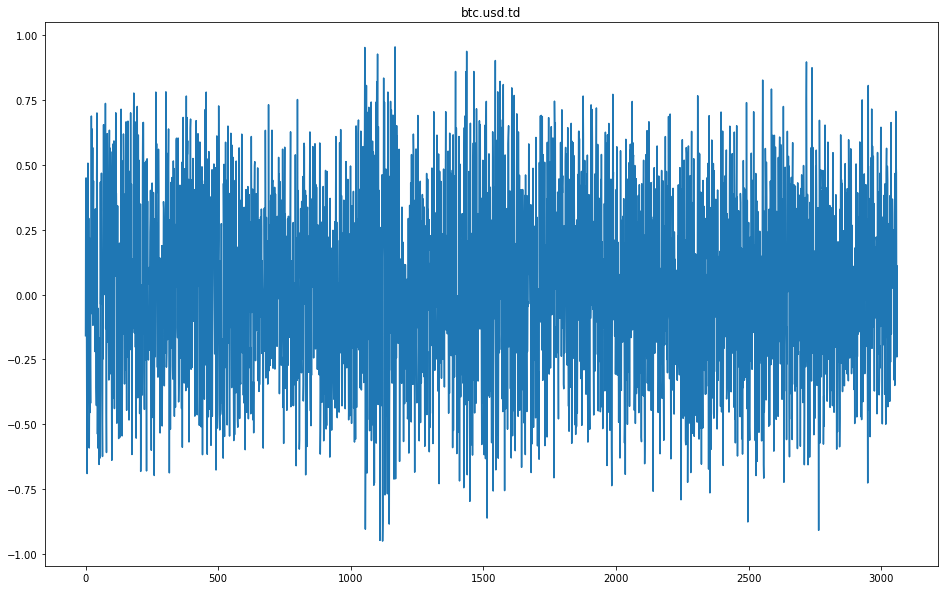

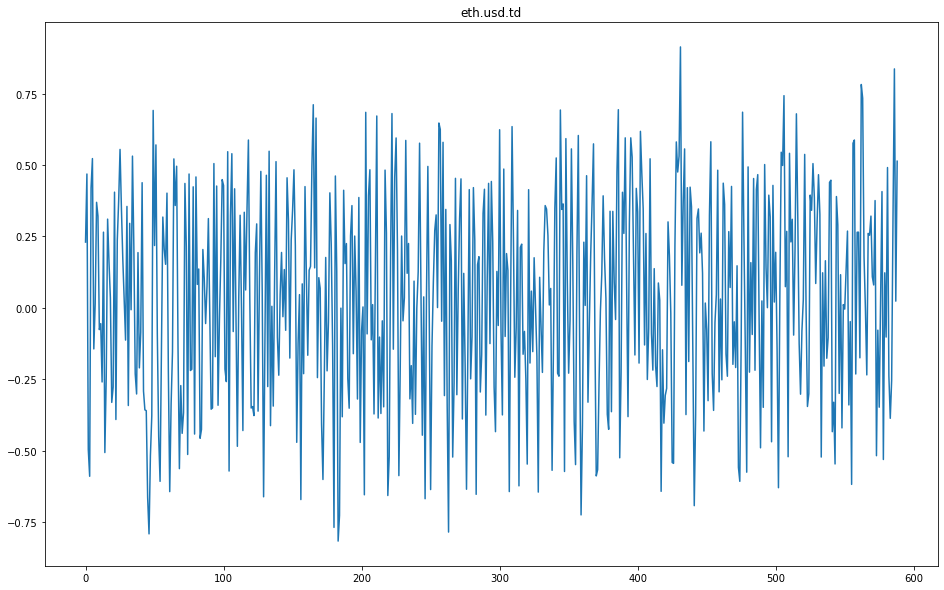

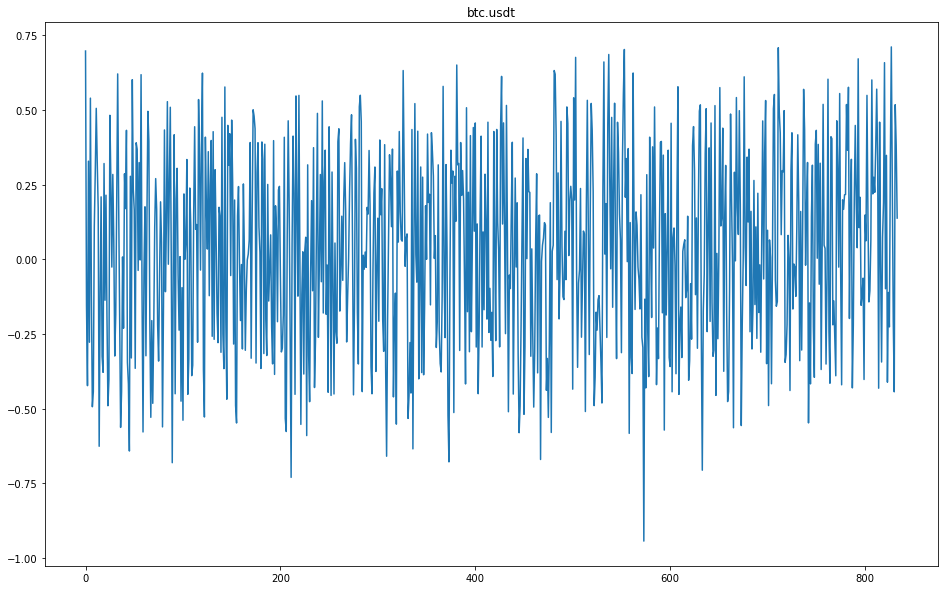

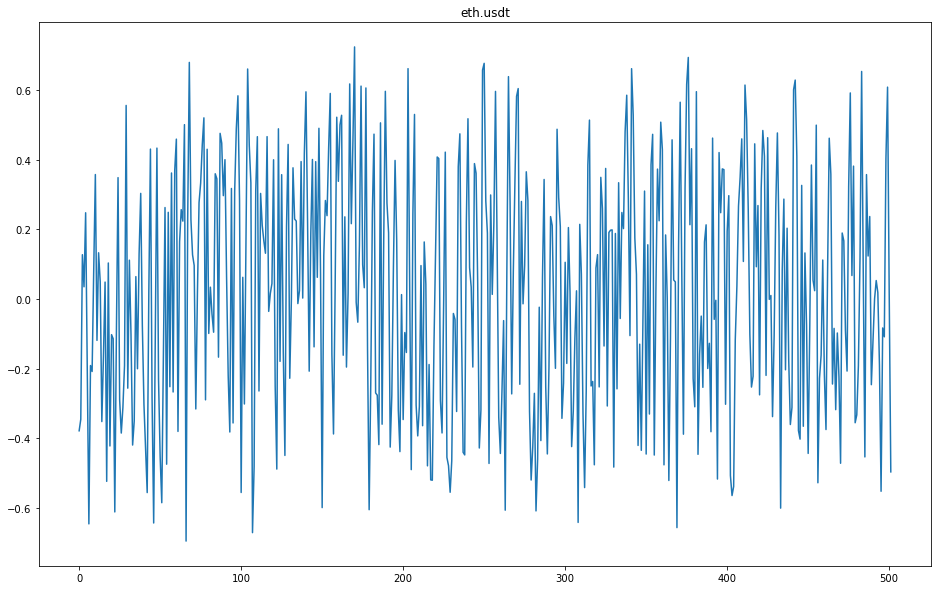

In [205]:
i = 0
period = 4096
for product in product_list:
    all_dates = os.listdir(DATA_PATH + product)
    all_signal = get_all_signal(np.array(all_dates), product, "kdj.k."+str(period), period,HEAD_PATH, SAVE_PATH)
    i = i+1
    plt.figure(i, figsize=(16, 10))
    plt.title(product)
    plt.plot(all_signal)
    print(product, "kurtosis=", kurtosis(all_signal, fisher=False), " skew=", skew(all_signal))

# btc.usd.td kurtosis= 2.249758924591974  skew= 0.006987812118276215
# eth.usd.td kurtosis= 2.16038413208032  skew= -0.12721181999406092
# btc.usdt kurtosis= 2.133576111516726  skew= -0.08941621445858884
# eth.usdt kurtosis= 1.9714293334120403  skew= -0.04315524038390643




- we know that standard normal distribution is 3, so 3.29 is a little bit higher but still close to normal distribution
- as we see above, range.pos.signal and dbook.signal are good signals, they have kurtosis of slightly above 3
- open.int.ret.signal and nr.signal are not good signals, and they have kurtosis above 8
- nr.vanish.signal is better than nr.signal, and it has kurtosis much lower
- so when we want to improve our signals, we can focus on how to decrease the kurtosis


- kurtosis is used to measure fatness and thiness of the shape of the density distribution
- financial has fat tails, which may lead to large kurtosis value
- so we can use vanish techniques to reduce it 

In [206]:
from collections import OrderedDict
import itertools
open_list = np.arange(0.5, 1, 0.025)
thre_list = []
for cartesian in itertools.product(open_list, np.array([0.2, 0.4, 0.6, 0.8, 1.0])):
    thre_list.append((cartesian[0], -cartesian[0] * cartesian[1]))
thre_list = np.array(thre_list)
thre_mat = pd.DataFrame(data=OrderedDict([("open", thre_list[:, 0]), ("close", thre_list[:, 1])]))
np.shape(thre_mat)
thre_mat_list = dict([])
for product in product_list:
    thre_mat_list[product] = thre_mat

In [207]:
%%time
get_list_signal_stat("kdj.k.4096", thre_mat_list, product_list, atr_filter_list,
                     split_str="2020", min_pnl=2, min_num=20, reverse=1)

# training
# btc.usd.td
# 916 143
# eth.usd.td
# 173 43
# btc.usdt
# 105 138
# eth.usdt
# 34 138
# testing
# btc.usd.td
# eth.usd.td
# btc.usdt
# eth.usdt
# Wall time: 1h 1min 3s



training
btc.usd.td
916 143
eth.usd.td
173 43
btc.usdt
105 138
eth.usdt
34 138
testing
btc.usd.td
eth.usd.td
btc.usdt
eth.usdt
Wall time: 1h 1min 3s


In [208]:
%%time
signal_stat = get_list_signal_result("kdj.k.4096", product_list, reverse=1, min_pnl=2, min_num=20)

# eth.usd.td train sharpe  0.7101238542874602 test sharpe  0.9156026950184208
# btc.usdt train sharpe  0.6452200686595748 test sharpe  -0.6251366758122491
# Wall time: 93 ms




eth.usd.td train sharpe  0.7101238542874602 test sharpe  0.9156026950184208
btc.usdt train sharpe  0.6452200686595748 test sharpe  -0.6251366758122491
Wall time: 93 ms


In [60]:
class foctor_kdj_j_period(factor_template):
    factor_name = "kdj.j.period"
    
    params = OrderedDict([
        ("period", np.power(2, range(10,13)))
    ])
    
    def formula(self, data, period):
        return ewma(ewma((zero_divide(data["wpr"]-data["min."+str(period)], data["max."+str(period)]-data["min."+str(period)])-0.5)*2, round(period/5),
                        adjust=True), round(period/5), adjust=True).values
    


In [61]:
x12 = foctor_kdj_j_period()
for product in product_list:
    create_signal_path(x12, product, SAVE_PATH)

e:/intern/tmp pkl/btc.usd.td/kdj.j.1024
e:/intern/tmp pkl/btc.usd.td/kdj.j.2048
e:/intern/tmp pkl/btc.usd.td/kdj.j.4096
e:/intern/tmp pkl/eth.usd.td/kdj.j.1024
e:/intern/tmp pkl/eth.usd.td/kdj.j.2048
e:/intern/tmp pkl/eth.usd.td/kdj.j.4096
e:/intern/tmp pkl/btc.usdt/kdj.j.1024
e:/intern/tmp pkl/btc.usdt/kdj.j.2048
e:/intern/tmp pkl/btc.usdt/kdj.j.4096
e:/intern/tmp pkl/eth.usdt/kdj.j.1024
e:/intern/tmp pkl/eth.usdt/kdj.j.2048
e:/intern/tmp pkl/eth.usdt/kdj.j.4096


In [55]:
product_list

['btc.usd.td', 'eth.usd.td', 'btc.usdt', 'eth.usdt']

In [62]:
%%time
for product in product_list[3:]:
    file_list = list(map(lambda x: DATA_PATH+product+"/"+x, os.listdir(DATA_PATH + product)))
    parLapply(CORE_NUM, file_list, build_composite_signal,signal_list=x12, product=product, HEAD_PATH=SAVE_PATH, n=14)
;
# Wall time: 15min 35s

Wall time: 4min 27s


''

btc.usd.td kurtosis= 2.3986575688268954  skew= -0.02959555965219069
eth.usd.td kurtosis= 2.245712848158869  skew= -0.11630602569075688
btc.usdt kurtosis= 2.1478292195757938  skew= -0.07371975263527791
eth.usdt kurtosis= 2.0583984519387912  skew= 0.018760675169990762
Wall time: 2min 23s


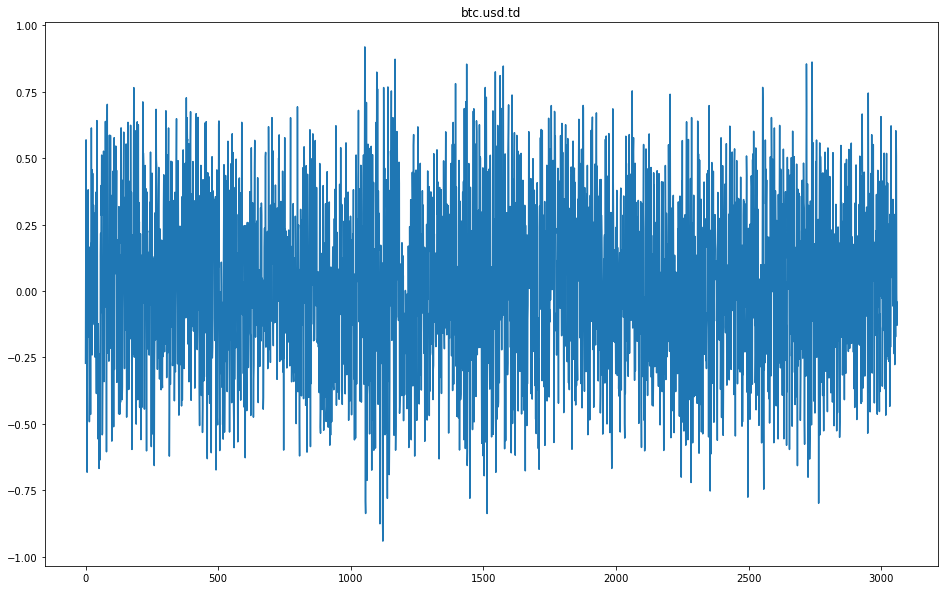

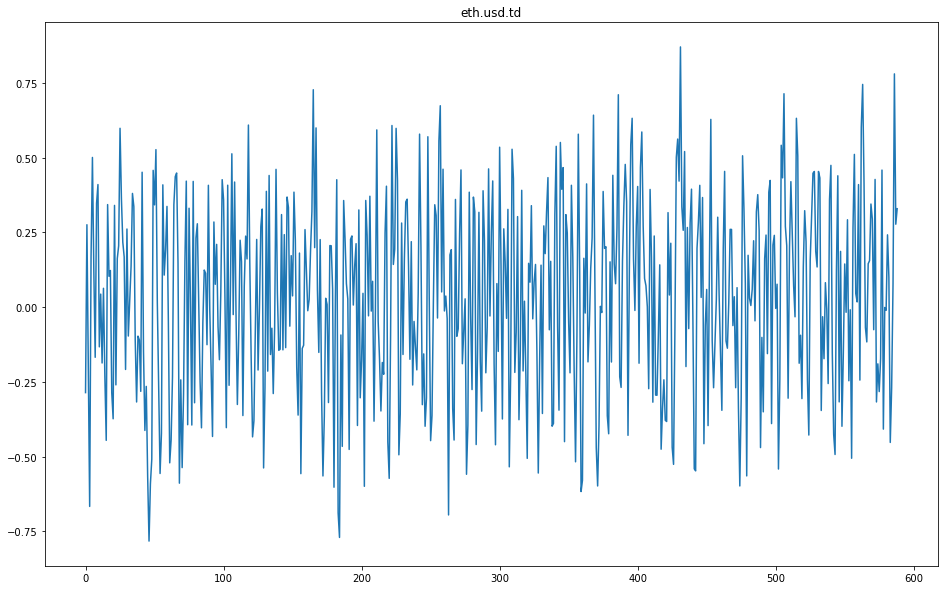

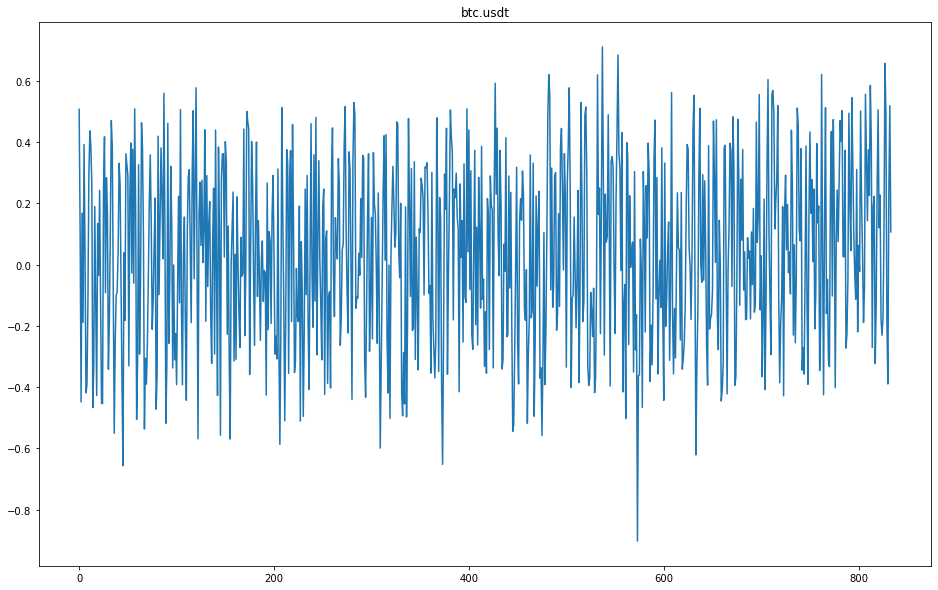

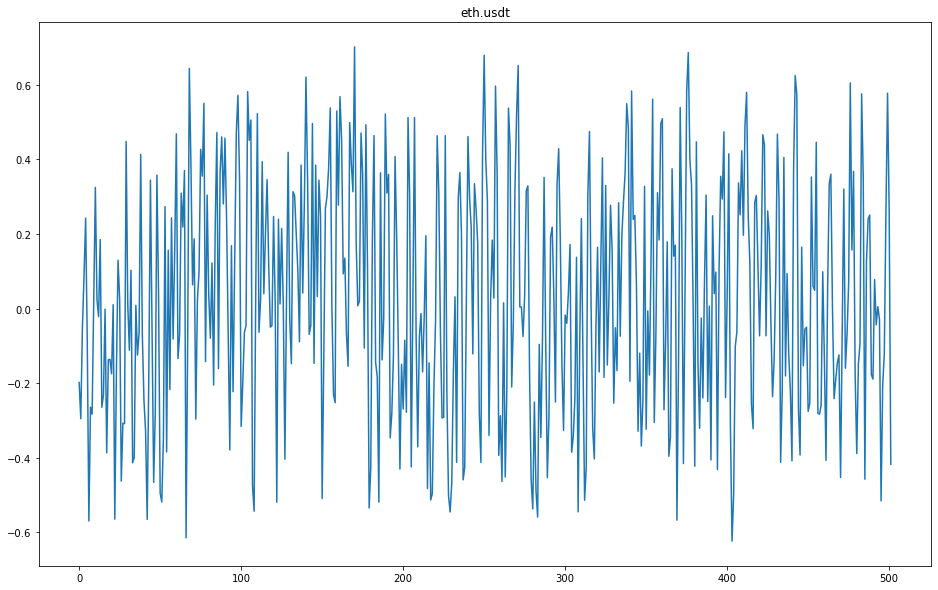

In [213]:
%%time
i = 0
period = 4096
for product in product_list:
    all_dates = os.listdir(DATA_PATH + product)
    all_signal = get_all_signal(np.array(all_dates), product, "kdj.j."+str(period), period,HEAD_PATH,SAVE_PATH)
    i = i+1;
    plt.figure(i, figsize=(16, 10));
    plt.title(product);
    plt.plot(all_signal);
    print(product, "kurtosis=", kurtosis(all_signal, fisher=False), " skew=", skew(all_signal));
    
# btc.usd.td kurtosis= 2.3986575688268954  skew= -0.02959555965219069
# eth.usd.td kurtosis= 2.245712848158869  skew= -0.11630602569075688
# btc.usdt kurtosis= 2.1478292195757938  skew= -0.07371975263527791
# eth.usdt kurtosis= 2.0583984519387912  skew= 0.018760675169990762
# Wall time: 2min 23s





In [214]:
from collections import OrderedDict
import itertools
open_list = np.arange(0.5, 1, 0.025)
thre_list = []
for cartesian in itertools.product(open_list, np.array([0.2, 0.4, 0.6, 0.8, 1.0])):
    thre_list.append((cartesian[0], -cartesian[0] * cartesian[1]))
thre_list = np.array(thre_list)
bitmex_thre_mat = pd.DataFrame(data=OrderedDict([("open", thre_list[:, 0]), ("close", thre_list[:, 1])]))
open_list = np.arange(0.4, 0.6, 0.01)
thre_list = []
for cartesian in itertools.product(open_list, np.array([0.2, 0.4, 0.6, 0.8, 1.0])):
    thre_list.append((cartesian[0], -cartesian[0] * cartesian[1]))
thre_list = np.array(thre_list)
binance_thre_mat = pd.DataFrame(data=OrderedDict([("open", thre_list[:, 0]), ("close", thre_list[:, 1])]))
thre_mat_list = dict([])
thre_mat_list["btc.usd.td"] = bitmex_thre_mat
thre_mat_list["eth.usd.td"] = bitmex_thre_mat
thre_mat_list["btc.usdt"] = binance_thre_mat
thre_mat_list["eth.usdt"] = binance_thre_mat



In [215]:
%%time
get_list_signal_stat("kdj.j.4096", thre_mat_list, product_list, atr_filter_list,
                     split_str="2020", min_pnl=2, min_num=20, reverse=1)


# training
# btc.usd.td
# 916 143
# eth.usd.td
# 173 43
# btc.usdt
# 105 138
# eth.usdt
# 34 138
# testing
# btc.usd.td
# eth.usd.td
# btc.usdt
# eth.usdt
# Wall time: 46min 39s


training
btc.usd.td
916 143
eth.usd.td
173 43
btc.usdt
105 138
eth.usdt
34 138
testing
btc.usd.td
eth.usd.td
btc.usdt
eth.usdt
Wall time: 46min 39s


In [217]:
signal_stat = get_list_signal_result("kdj.j.4096", product_list,min_pnl=2, min_num=20)

# btc.usd.td train sharpe  0.2199640898115026 test sharpe  -1.1173009434167334
# eth.usd.td train sharpe  0.9309391566627326 test sharpe  1.9936686462627426
# eth.usdt train sharpe  0.7101409498262334 test sharpe  -2.3614451369223115


btc.usd.td train sharpe  0.2199640898115026 test sharpe  -1.1173009434167334
eth.usd.td train sharpe  0.9309391566627326 test sharpe  1.9936686462627426
eth.usdt train sharpe  0.7101409498262334 test sharpe  -2.3614451369223115
